# <center> Enhancing Business Intelligence through Predictive Analytics: Recommendation Systems for Market Account Holders

Capstone Project 10/05/2025 - MSc in Data Analytics Y2 S1

Data: marketing_campaign.csv from https://www.kaggle.com/datasets/whenamancodes/customer-personality-analysis/data


# Introduction
Find in this notebook the research analyses in practice. The code was structured based on Cross-Industry Standard Process for Data Mining (CRISP-DM) Methodology phases:

1. Research Understanding Phase 
2. Data Understanding Phase
3. Data Preparation Phase
4. Modelling Phase
5. Evaluation Phase


# 1. Research Understanding

The research is about investigating the following dataset with the objective of applying recommender systems techniques. Setting cohesive parameters in order to test them and evaluate the chosen methods. 


Initially, the research was designed to apply the most used methods by specialists in this domain for recommender systems:
- Content-Based Filter (CBF)
- Collaborative Filter (CF)
- Hydrid (Mix of CBF and CF methods)

Additionally, find presented along the study the modeling tests using Artificial Neural Networks. Finally, find presented the methods' perfomance evaluation.
Attributes

# 2. Data Understanding

- Import dataset
- Check variables
- Check data quality:
    - Dataset size
    - Missing values
    - Duplicates
    - Data type
    - Data distribution
    

In [1]:
#pip install missingno

In [120]:
# Import libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import numpy as np
import plotly.express as px
import missingno as msno
import cProfile

# To suppress the warnings
import warnings
warnings.filterwarnings('ignore') 

In [3]:
# Read csv and show top 5 rows 

data = pd.read_csv('marketing_campaign.csv')
data.head()

Unnamed: 0    ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0           0  5524        1957  Graduation         Single  58138.0        0   
1           1  2174        1954  Graduation         Single  46344.0        1   
2           2  4141        1965  Graduation       Together  71613.0        0   
3           3  6182        1984  Graduation       Together  26646.0        1   
4           4  5324        1981         PhD        Married  58293.0        1   

   Teenhome Dt_Customer  Recency  ...  NumWebVisitsMonth  AcceptedCmp3  \
0         0  2012-09-04       58  ...                  7             0   
1         1  2014-03-08       38  ...                  5             0   
2         0  2013-08-21       26  ...                  4             0   
3         0  2014-02-10       26  ...                  6             0   
4         0  2014-01-19       94  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0  

[5 rows x 30 columns]

In [4]:
# Show last 5 rows 
data.tail()

Unnamed: 0     ID  Year_Birth   Education Marital_Status   Income  \
2235        2235  10870        1967  Graduation        Married  61223.0   
2236        2236   4001        1946         PhD       Together  64014.0   
2237        2237   7270        1981  Graduation       Divorced  56981.0   
2238        2238   8235        1956      Master       Together  69245.0   
2239        2239   9405        1954         PhD        Married  52869.0   

      Kidhome  Teenhome Dt_Customer  Recency  ...  NumWebVisitsMonth  \
2235        0         1  2013-06-13       46  ...                  5   
2236        2         1  2014-06-10       56  ...                  7   
2237        0         0  2014-01-25       91  ...                  6   
2238        0         1  2014-01-24        8  ...                  3   
2239        1         1  2012-10-15       40  ...                  7   

      AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
2235             0             0             0             0             0   
2236             0             0             0             1             0   
2237             0             1             0             0             0   
2238             0             0             0             0             0   
2239             0             0             0             0             0   

      Complain  Z_CostContact  Z_Revenue  Response  
2235         0              3         11         0  
2236         0              3         11         0  
2237         0              3         11         0  
2238         0              3         11         0  
2239         0              3         11         1  

[5 rows x 30 columns]

In [5]:
# Columns, Data type, Count, Memory usage
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           2240 non-null   int64  
 1   ID                   2240 non-null   int64  
 2   Year_Birth           2240 non-null   int64  
 3   Education            2240 non-null   object 
 4   Marital_Status       2240 non-null   object 
 5   Income               2216 non-null   float64
 6   Kidhome              2240 non-null   int64  
 7   Teenhome             2240 non-null   int64  
 8   Dt_Customer          2240 non-null   object 
 9   Recency              2240 non-null   int64  
 10  MntWines             2240 non-null   int64  
 11  MntFruits            2240 non-null   int64  
 12  MntMeatProducts      2240 non-null   int64  
 13  MntFishProducts      2240 non-null   int64  
 14  MntSweetProducts     2240 non-null   int64  
 15  MntGoldProds         2240 non-null   i

#### Dataset features: 


People

- ID: Customer's unique identifier
- Year_Birth: Customer's birth year
- Education: Customer's education level
- Marital_Status: Customer's marital status
- Income: Customer's yearly household income
- Kidhome: Number of children in customer's household
- Teenhome: Number of teenagers in customer's household
- Dt_Customer: Date of customer's enrollment with the company
- Recency: Number of days since customer's last purchase
- Complain: 1 if the customer complained in the last 2 years, 0 otherwise

Products

- MntWines: Amount spent on wine in last 2 years
- MntFruits: Amount spent on fruits in last 2 years
- MntMeatProducts: Amount spent on meat in last 2 years
- MntFishProducts: Amount spent on fish in last 2 years
- MntSweetProducts: Amount spent on sweets in last 2 years
- MntGoldProds: Amount spent on gold in last 2 years

Promotion

- NumDealsPurchases: Number of purchases made with a discount
- AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
- AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
- AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
- AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
- AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
- Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

Place

- NumWebPurchases: Number of purchases made through the company’s website
- NumCatalogPurchases: Number of purchases made using a catalogue
- NumStorePurchases: Number of purchases made directly in stores
- NumWebVisitsMonth: Number of visits to company’s website in the last month

In [6]:
# Statistical information per numerical feature
data.describe()

Unnamed: 0            ID   Year_Birth         Income      Kidhome  \
count  2240.000000   2240.000000  2240.000000    2216.000000  2240.000000   
mean   1119.500000   5592.159821  1968.805804   52247.251354     0.444196   
std     646.776623   3246.662198    11.984069   25173.076661     0.538398   
min       0.000000      0.000000  1893.000000    1730.000000     0.000000   
25%     559.750000   2828.250000  1959.000000   35303.000000     0.000000   
50%    1119.500000   5458.500000  1970.000000   51381.500000     0.000000   
75%    1679.250000   8427.750000  1977.000000   68522.000000     1.000000   
max    2239.000000  11191.000000  1996.000000  666666.000000     2.000000   

          Teenhome      Recency     MntWines    MntFruits  MntMeatProducts  \
count  2240.000000  2240.000000  2240.000000  2240.000000      2240.000000   
mean      0.506250    49.109375   303.935714    26.302232       166.950000   
std       0.544538    28.962453   336.597393    39.773434       225.715373   
min       0.000000     0.000000     0.000000     0.000000         0.000000   
25%       0.000000    24.000000    23.750000     1.000000        16.000000   
50%       0.000000    49.000000   173.500000     8.000000        67.000000   
75%       1.000000    74.000000   504.250000    33.000000       232.000000   
max       2.000000    99.000000  1493.000000   199.000000      1725.000000   

       ...  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
count  ...        2240.000000   2240.000000   2240.000000   2240.000000   
mean   ...           5.316518      0.072768      0.074554      0.072768   
std    ...           2.426645      0.259813      0.262728      0.259813   
min    ...           0.000000      0.000000      0.000000      0.000000   
25%    ...           3.000000      0.000000      0.000000      0.000000   
50%    ...           6.000000      0.000000      0.000000      0.000000   
75%    ...           7.000000      0.000000      0.000000      0.000000   
max    ...          20.000000      1.000000      1.000000      1.000000   

       AcceptedCmp1  AcceptedCmp2     Complain  Z_CostContact  Z_Revenue  \
count   2240.000000   2240.000000  2240.000000         2240.0     2240.0   
mean       0.064286      0.013393     0.009375            3.0       11.0   
std        0.245316      0.114976     0.096391            0.0        0.0   
min        0.000000      0.000000     0.000000            3.0       11.0   
25%        0.000000      0.000000     0.000000            3.0       11.0   
50%        0.000000      0.000000     0.000000            3.0       11.0   
75%        0.000000      0.000000     0.000000            3.0       11.0   
max        1.000000      1.000000     1.000000            3.0       11.0   

          Response  
count  2240.000000  
mean      0.149107  
std       0.356274  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       0.000000  
max       1.000000  

[8 rows x 27 columns]

In [7]:
# Check for missing values

data.isnull().sum()

Unnamed: 0              0
ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

<Figure size 1200x800 with 0 Axes>

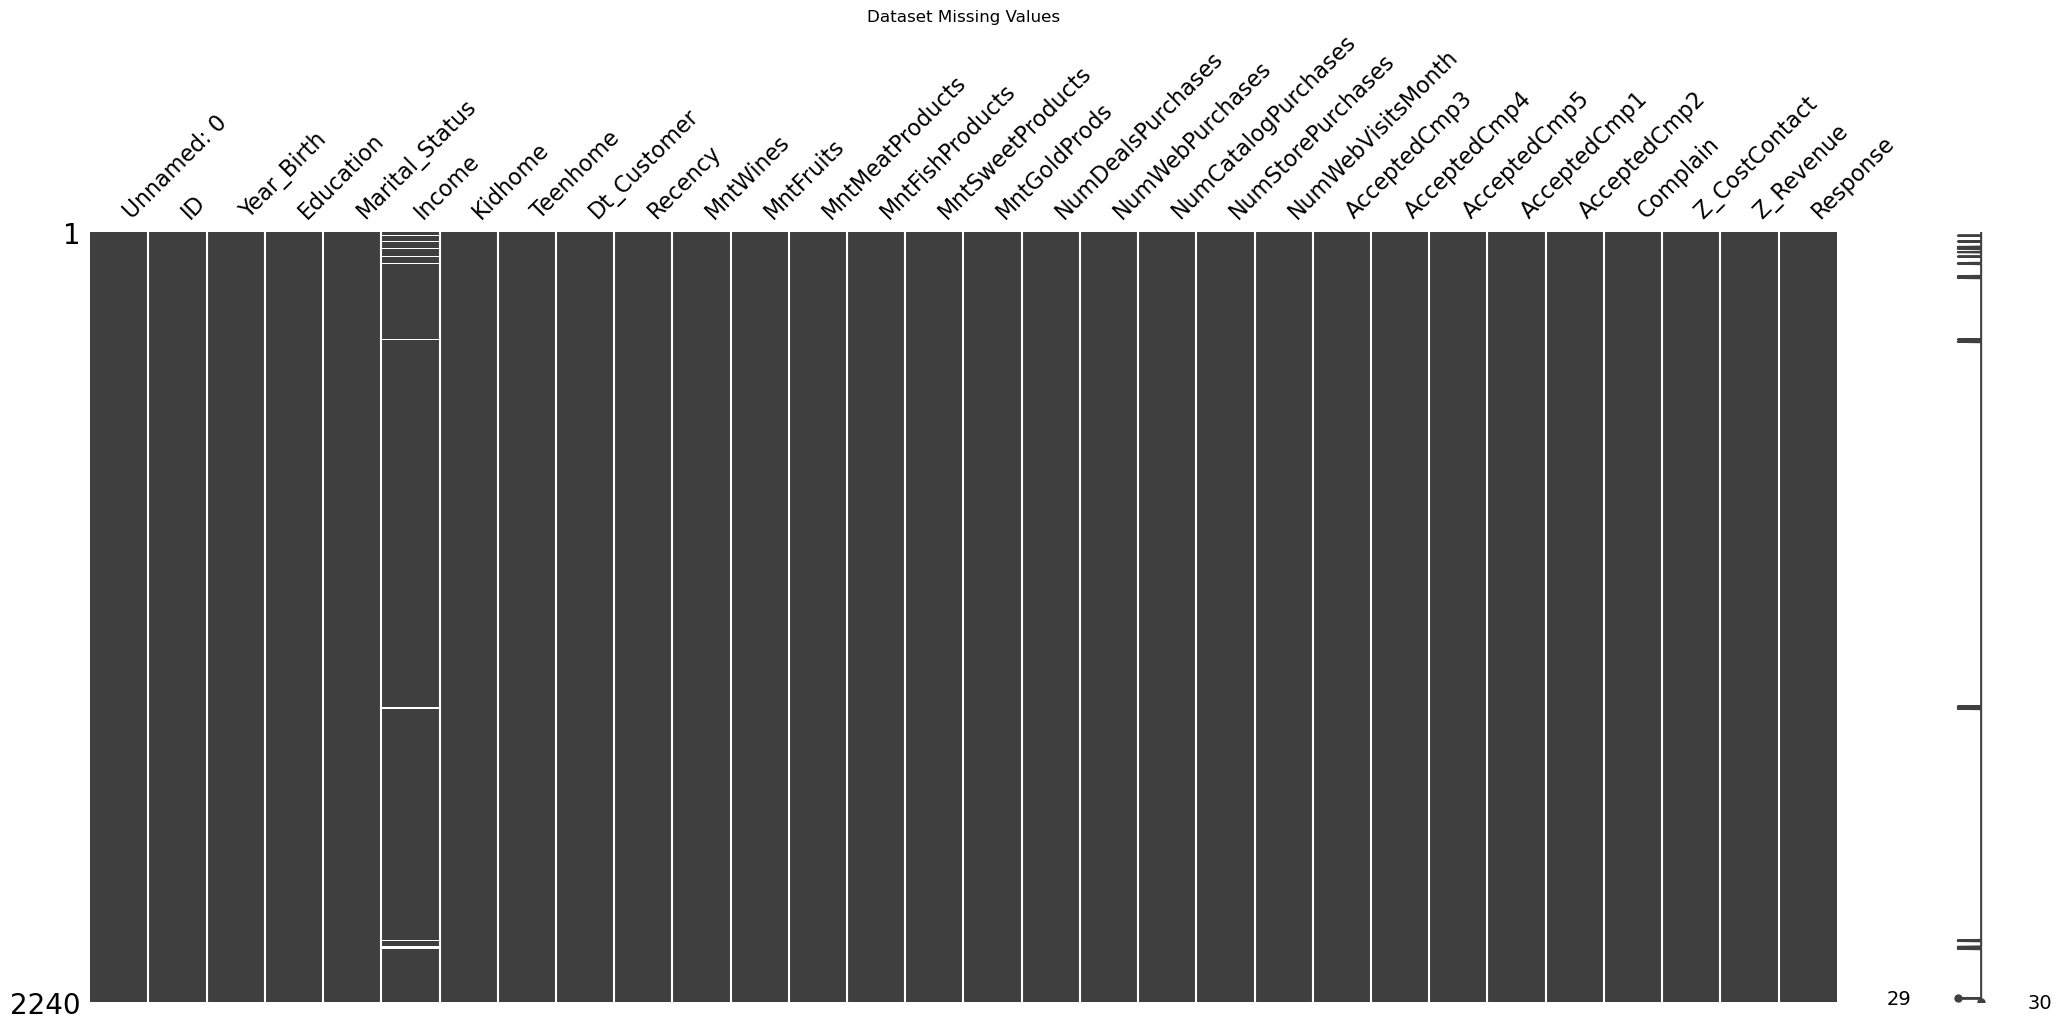

In [8]:
# Visualising missing values
plt.figure(figsize=(12, 8))
msno.matrix(data)
plt.title('Dataset Missing Values')
plt.show()

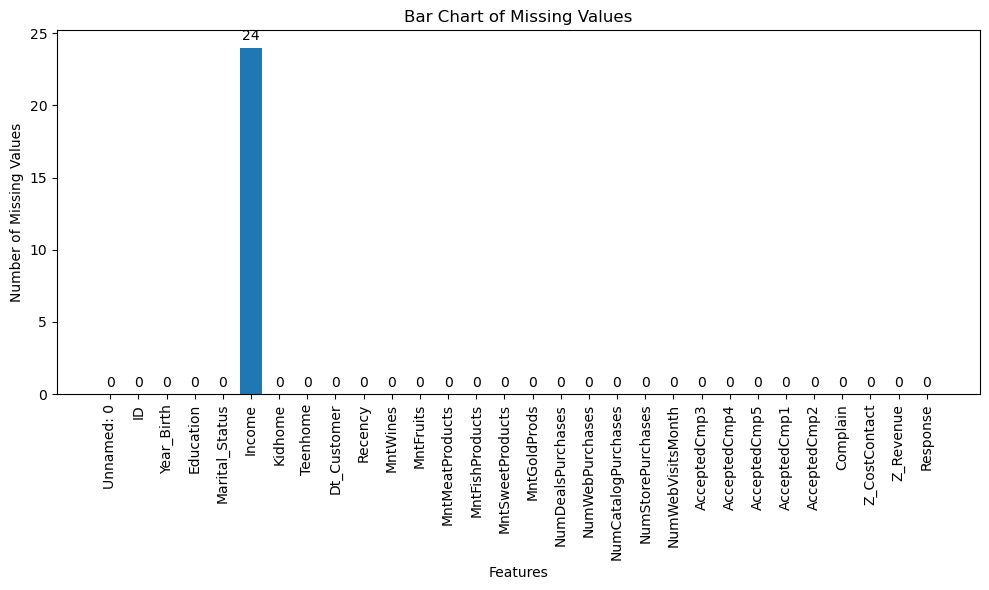

In [9]:
# Visualising missing values with bar plot
missing_counts = data.isnull().sum()

plt.figure(figsize=(10, 6))
bars = plt.bar(missing_counts.index, missing_counts.values)

# Adding text labels above the bars
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height}',
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),  # 3 points vertical offset
                 textcoords="offset points",
                 ha='center', va='bottom')

plt.xlabel('Features')
plt.ylabel('Number of Missing Values')
plt.title('Bar Chart of Missing Values')
plt.xticks(rotation=90)  # Rotate the x-axis labels if they overlap
plt.tight_layout()  # Adjust the layout to fit the rotated labels
plt.show()

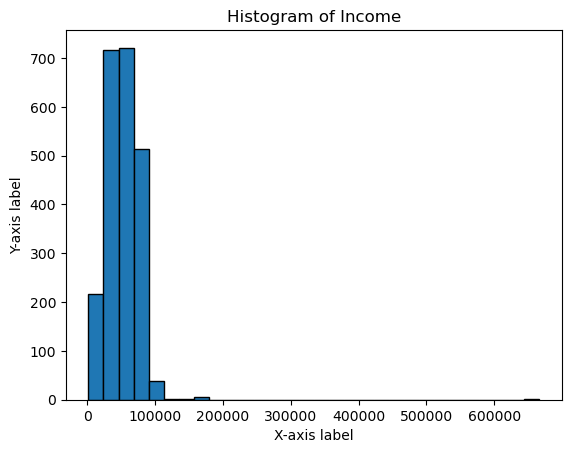

In [10]:
# Histogram of a numerical column
plt.hist(data['Income'], bins=30, edgecolor='k')
plt.xlabel('X-axis label')
plt.ylabel('Y-axis label')
plt.title('Histogram of Income')
plt.show()

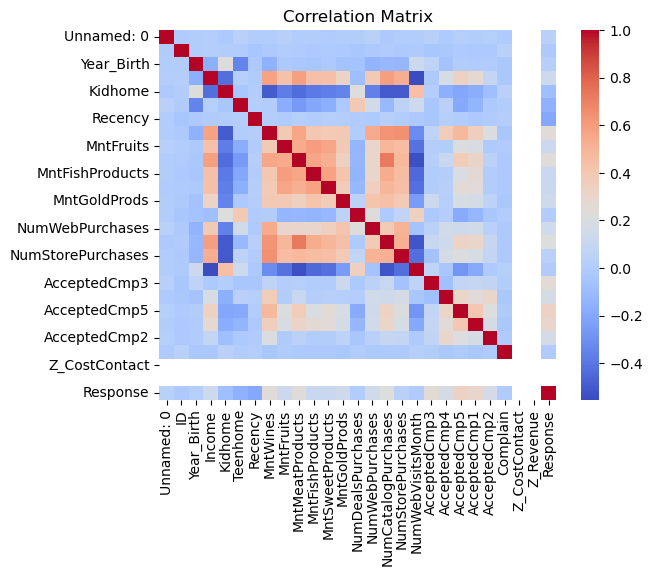

In [11]:
# Correlation matrix
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

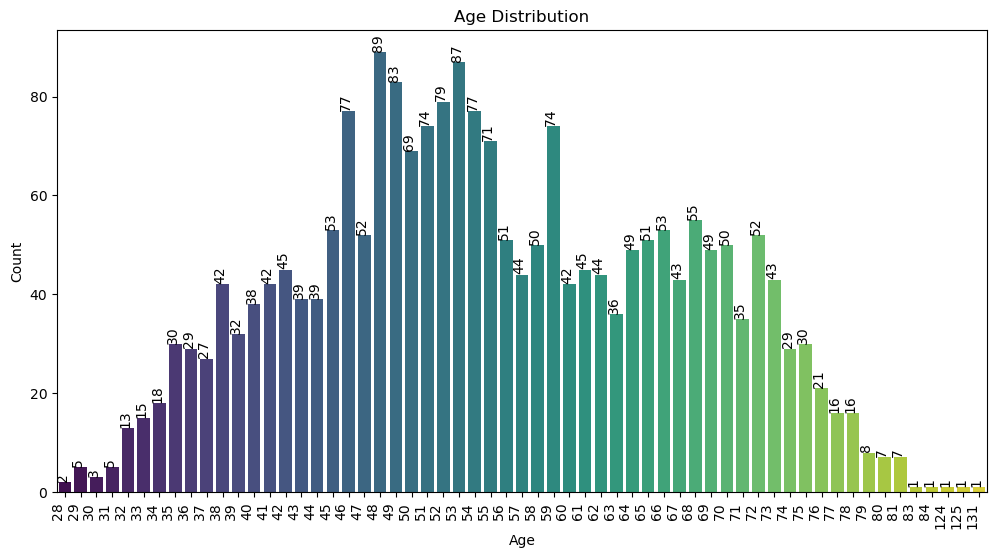

In [12]:
# Bar plot of age distribution

# 'Year_Birth' is the column containing birth years
current_year = dt.datetime.now().year
data['Age'] = current_year - data['Year_Birth']

# Count the occurrences of each age group
age_counts = data['Age'].value_counts().sort_index()

# Plot a bar chart with rotated x-axis labels and labels on top of the bars
plt.figure(figsize=(12, 6))
bar_plot = sns.barplot(x=age_counts.index, y=age_counts.values, palette='viridis')

# Rotate x-axis labels
bar_plot.set_xticklabels(bar_plot.get_xticklabels(), rotation=90, ha='right')

# Add labels on top of the bars with rotation
for bar, count in zip(bar_plot.patches, age_counts.values):
    bar_plot.text(bar.get_x() + bar.get_width() / 2 - 0.15, bar.get_height() + 0.1, str(count), ha='center', va='bottom', rotation=90, color='black', fontsize=10)

plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# 3. Data Preparation

- Creating new features and doing modifications for further data analyses

In [13]:
# Define age bins 
age_bins = [18, 30, 40, 50, 60, 70, 80, 90, 100, 110]
age_labels = ['18-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90-100', '101-150']

# Create age groups
data['Age_Group'] = pd.cut(data['Age'], bins=age_bins, labels=age_labels)

# Count the occurrences of each age group
age_group_counts = data['Age_Group'].value_counts()


In [14]:
# Check duplicated rows
duplicate_rows_df = data[data.duplicated()]
print("Number of duplicate rows: ", duplicate_rows_df.shape)

Number of duplicate rows:  (0, 32)


In [15]:
# Display rows with NaN values
nan_rows = data[data.isna().any(axis=1)]

print("Rows with NaN values:")
nan_rows.head()

Rows with NaN values:


Unnamed: 0    ID  Year_Birth   Education Marital_Status  Income  Kidhome  \
10          10  1994        1983  Graduation        Married     NaN        1   
27          27  5255        1986  Graduation         Single     NaN        1   
43          43  7281        1959         PhD         Single     NaN        0   
48          48  7244        1951  Graduation         Single     NaN        2   
58          58  8557        1982  Graduation         Single     NaN        1   

    Teenhome Dt_Customer  Recency  ...  AcceptedCmp4  AcceptedCmp5  \
10         0  2013-11-15       11  ...             0             0   
27         0  2013-02-20       19  ...             0             0   
43         0  2013-11-05       80  ...             0             0   
48         1  2014-01-01       96  ...             0             0   
58         0  2013-06-17       57  ...             0             0   

    AcceptedCmp1  AcceptedCmp2  Complain  Z_CostContact  Z_Revenue  Response  \
10             0             0         0              3         11         0   
27             0             0         0              3         11         0   
43             0             0         0              3         11         0   
48             0             0         0              3         11         0   
58             0             0         0              3         11         0   

    Age  Age_Group  
10   41      40-49  
27   38      30-39  
43   65      60-69  
48   73      70-79  
58   42      40-49  

[5 rows x 32 columns]

In [16]:
# Create a dataframe with dropped NaN

data_no_nan = data.dropna()

# Display the new dataframe
print("Original dataframe shape: ", data.shape)
print("Dataframe shape after dropping NaN values: ", data_no_nan.shape)
print("\nDataframe without NaN values:")

data_no_nan.head()

Original dataframe shape:  (2240, 32)
Dataframe shape after dropping NaN values:  (2213, 32)

Dataframe without NaN values:


Unnamed: 0    ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0           0  5524        1957  Graduation         Single  58138.0        0   
1           1  2174        1954  Graduation         Single  46344.0        1   
2           2  4141        1965  Graduation       Together  71613.0        0   
3           3  6182        1984  Graduation       Together  26646.0        1   
4           4  5324        1981         PhD        Married  58293.0        1   

   Teenhome Dt_Customer  Recency  ...  AcceptedCmp4  AcceptedCmp5  \
0         0  2012-09-04       58  ...             0             0   
1         1  2014-03-08       38  ...             0             0   
2         0  2013-08-21       26  ...             0             0   
3         0  2014-02-10       26  ...             0             0   
4         0  2014-01-19       94  ...             0             0   

   AcceptedCmp1  AcceptedCmp2  Complain  Z_CostContact  Z_Revenue  Response  \
0             0             0         0              3         11         1   
1             0             0         0              3         11         0   
2             0             0         0              3         11         0   
3             0             0         0              3         11         0   
4             0             0         0              3         11         0   

   Age  Age_Group  
0   67      60-69  
1   70      60-69  
2   59      50-59  
3   40      30-39  
4   43      40-49  

[5 rows x 32 columns]

In [17]:
# Check for NaN on new dataframe
nan_values = data_no_nan.isna().sum()
nan_values

Unnamed: 0             0
ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
Age                    0
Age_Group              0
dtype: int64

In [18]:
# Column distribution Marital_Status

counts = data_no_nan['Marital_Status'].value_counts()
count_percentage = data_no_nan['Marital_Status'].value_counts(1)*100
counts_df = pd.DataFrame({'Marital_Status':counts.index,'Count':counts.values,'Percent':np.round(count_percentage.values,2)})
display(counts_df)
px.bar(data_frame=counts_df,
 x='Marital_Status',
 y='Count',
 color='Count',
 color_continuous_scale='blues',
 text_auto=True,
 title=f'Count of Marital_Status')

Marital_Status  Count  Percent
0        Married    857    38.73
1       Together    572    25.85
2         Single    470    21.24
3       Divorced    231    10.44
4          Widow     76     3.43
5          Alone      3     0.14
6         Absurd      2     0.09
7           YOLO      2     0.09

In [19]:
# Column distribution Education

counts = data_no_nan['Education'].value_counts()
count_percentage = data_no_nan['Education'].value_counts(1)*100
counts_df = pd.DataFrame({'Education':counts.index,'Count':counts.values,'Percent':np.round(count_percentage.values,2)})
display(counts_df)
px.bar(data_frame=counts_df,
 x='Education',
 y='Count',
 color='Count',
 color_continuous_scale='blues',
 text_auto=True,
 title=f'Count of Education')

Education  Count  Percent
0  Graduation   1116    50.43
1         PhD    480    21.69
2      Master    365    16.49
3    2n Cycle    198     8.95
4       Basic     54     2.44

In [20]:
# Column distribution Age

counts = data_no_nan['Age_Group'].value_counts()
count_percentage = data_no_nan['Age_Group'].value_counts(1)*100
counts_df = pd.DataFrame({'Age_Group':counts.index,'Count':counts.values,'Percent':np.round(count_percentage.values,2)})
display(counts_df)
px.bar(data_frame=counts_df,
 x='Age_Group',
 y='Count',
 color='Count',
 color_continuous_scale='blues',
 text_auto=True,
 title=f'Count of Age_Group')

Age_Group  Count  Percent
0     50-59    641    28.97
1     40-49    584    26.39
2     60-69    467    21.10
3     70-79    256    11.57
4     30-39    247    11.16
5     18-29     10     0.45
6     80-89      8     0.36
7    90-100      0     0.00
8   101-150      0     0.00

In [21]:
data_no_nan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2213 entries, 0 to 2239
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Unnamed: 0           2213 non-null   int64   
 1   ID                   2213 non-null   int64   
 2   Year_Birth           2213 non-null   int64   
 3   Education            2213 non-null   object  
 4   Marital_Status       2213 non-null   object  
 5   Income               2213 non-null   float64 
 6   Kidhome              2213 non-null   int64   
 7   Teenhome             2213 non-null   int64   
 8   Dt_Customer          2213 non-null   object  
 9   Recency              2213 non-null   int64   
 10  MntWines             2213 non-null   int64   
 11  MntFruits            2213 non-null   int64   
 12  MntMeatProducts      2213 non-null   int64   
 13  MntFishProducts      2213 non-null   int64   
 14  MntSweetProducts     2213 non-null   int64   
 15  MntGoldProds         

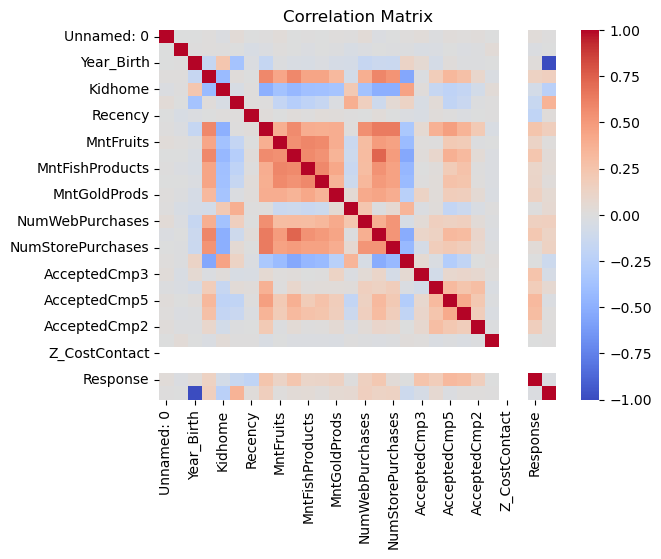

In [22]:
# Correlation matrix
correlation_matrix = data_no_nan.corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [23]:
# Create a main dataframe to build recommender system models
main_df = data_no_nan.drop(['Unnamed: 0',
                            'ID',
                            'Year_Birth',
                            'Dt_Customer',
                            'Recency',
                            'Complain',
                            'NumDealsPurchases',
                            'AcceptedCmp1',
                            'AcceptedCmp2',
                            'AcceptedCmp3',
                            'AcceptedCmp4',
                            'AcceptedCmp5',
                            'Response',
                            'NumWebPurchases',
                            'NumCatalogPurchases',
                            'NumStorePurchases',
                            'NumWebVisitsMonth',
                            'Z_CostContact',
                            'Z_Revenue'], axis=1)

In [24]:
# Rearrange column position
main_df =  main_df.reindex(columns=['Education',
                                    'Marital_Status',
                                    'Income',
                                    'Age',
                                    'Age_Group',
                                    'Kidhome',
                                    'Teenhome',
                                    'MntWines',
                                    'MntFruits',
                                    'MntMeatProducts',
                                    'MntFishProducts',
                                    'MntSweetProducts',
                                    'MntGoldProds'])

main_df.head()

Education Marital_Status   Income  Age Age_Group  Kidhome  Teenhome  \
0  Graduation         Single  58138.0   67     60-69        0         0   
1  Graduation         Single  46344.0   70     60-69        1         1   
2  Graduation       Together  71613.0   59     50-59        0         0   
3  Graduation       Together  26646.0   40     30-39        1         0   
4         PhD        Married  58293.0   43     40-49        1         0   

   MntWines  MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
0       635         88              546              172                88   
1        11          1                6                2                 1   
2       426         49              127              111                21   
3        11          4               20               10                 3   
4       173         43              118               46                27   

   MntGoldProds  
0            88  
1             6  
2            42  
3             5  
4            15

In [25]:
# Create new features for visualisation
main_df['children_count'] = main_df['Kidhome'] + main_df['Teenhome']
main_df['children'] = main_df.apply(lambda x : 1 if x['children_count'] > 0 else 0, axis=1)
main_df['amount_spent'] = main_df['MntWines'] + main_df['MntFruits'] + main_df['MntMeatProducts'] + main_df['MntFishProducts'] + main_df['MntSweetProducts'] + main_df['MntGoldProds']

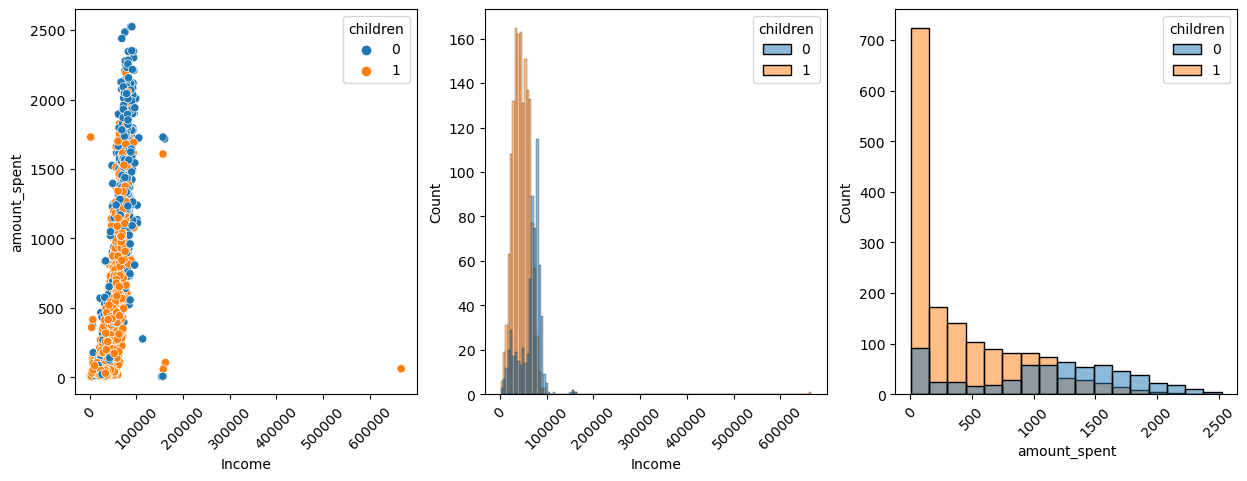

In [26]:
# Plot the visualisation
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
sns.scatterplot(data=main_df, x='Income', y='amount_spent', hue='children', ax=ax[0])
sns.histplot(data=main_df, x='Income', hue='children', ax=ax[1])
sns.histplot(data=main_df, x='amount_spent', hue='children', ax=ax[2])
plt.setp(ax[0].get_xticklabels(), rotation=45);
plt.setp(ax[1].get_xticklabels(), rotation=45);
plt.setp(ax[2].get_xticklabels(), rotation=45);

# 4. Modelling

## 4.1 Content-Based Filtering (CBF)

- Consists in creating a vector representing the features. Then the similarity between vectors should be calculated.
- The recommendations are similar for a set of customers.
- Personalised based on content (products).
- Several tests were made in order to achieve the execution of this method, however it did not suit for this dataset. 

In [27]:
# Import libraries 

from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [28]:
# Dataframe for content based filtering recommender
content_based_df = main_df

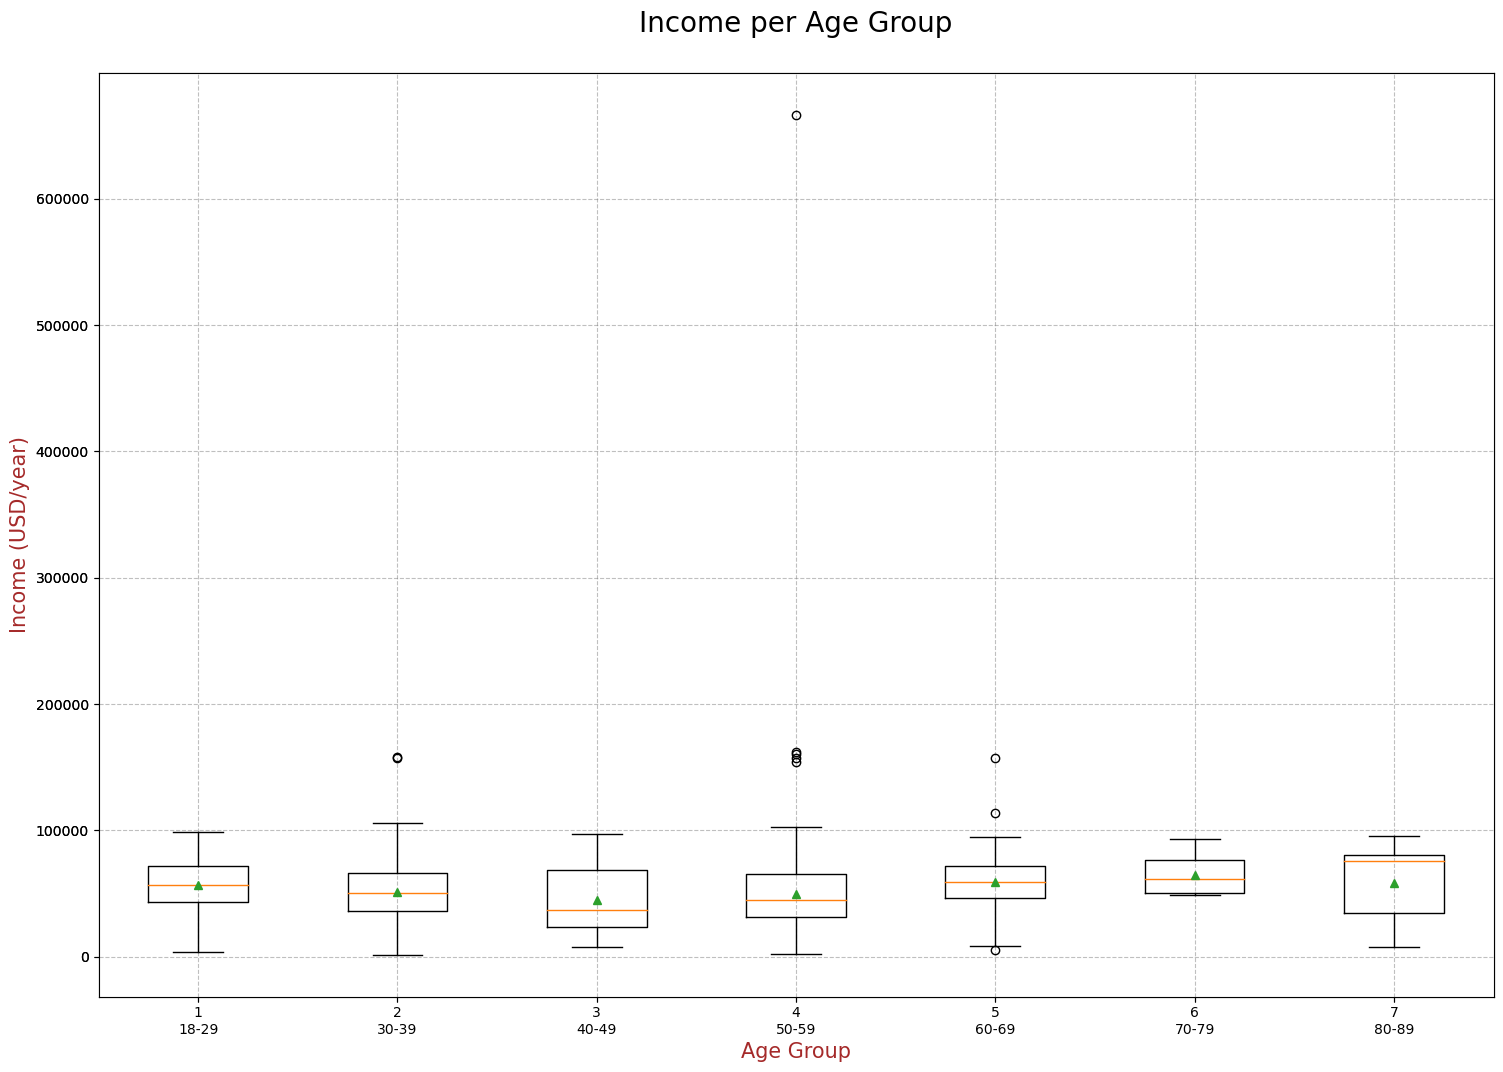

In [29]:
# Income per Age group boxplot
plotdata = [*(content_based_df.loc[content_based_df['Age_Group']==age_group, 'Income'] 
 for age_group in content_based_df['Age_Group'].unique())]

# Multiple boxplot visualisation
fig = plt.figure(figsize = [18,12])
plt.boxplot(plotdata)
ax = fig.add_subplot(111)
bp = ax.boxplot(plotdata, showmeans=True) #show mean values

plt.xticks((1,2,3,4,5,6,7),['\n18-29','\n30-39','\n40-49','\n50-59','\n60-69','\n70-79','\n80-89'])
plt.title("Income per Age Group\n", fontdict={'fontsize': 20, 'fontweight' : 20, 'color' : 'Black'})
plt.xlabel("Age Group", fontdict={'fontsize': 15, 'fontweight' : 20, 'color' : 'Brown'})
plt.ylabel("Income (USD/year)", fontdict={'fontsize': 15, 'fontweight' : 20, 'color' : 'Brown'})
plt.grid(True, which='both', linestyle='--', color='gray', alpha=0.5)
plt.show()

In [30]:
content_based_df

Education Marital_Status   Income  Age Age_Group  Kidhome  Teenhome  \
0     Graduation         Single  58138.0   67     60-69        0         0   
1     Graduation         Single  46344.0   70     60-69        1         1   
2     Graduation       Together  71613.0   59     50-59        0         0   
3     Graduation       Together  26646.0   40     30-39        1         0   
4            PhD        Married  58293.0   43     40-49        1         0   
...          ...            ...      ...  ...       ...      ...       ...   
2235  Graduation        Married  61223.0   57     50-59        0         1   
2236         PhD       Together  64014.0   78     70-79        2         1   
2237  Graduation       Divorced  56981.0   43     40-49        0         0   
2238      Master       Together  69245.0   68     60-69        0         1   
2239         PhD        Married  52869.0   70     60-69        1         1   

      MntWines  MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
0          635         88              546              172                88   
1           11          1                6                2                 1   
2          426         49              127              111                21   
3           11          4               20               10                 3   
4          173         43              118               46                27   
...        ...        ...              ...              ...               ...   
2235       709         43              182               42               118   
2236       406          0               30                0                 0   
2237       908         48              217               32                12   
2238       428         30              214               80                30   
2239        84          3               61                2                 1   

      MntGoldProds  children_count  children  amount_spent  
0               88               0         0          1617  
1                6               2         1            27  
2               42               0         0           776  
3                5               1         1            53  
4               15               1         1           422  
...            ...             ...       ...           ...  
2235           247               1         1          1341  
2236             8               3         1           444  
2237            24               0         0          1241  
2238            61               1         1           843  
2239            21               2         1           172  

[2213 rows x 16 columns]

In [31]:
content_based_df.isnull().sum()

Education           0
Marital_Status      0
Income              0
Age                 0
Age_Group           0
Kidhome             0
Teenhome            0
MntWines            0
MntFruits           0
MntMeatProducts     0
MntFishProducts     0
MntSweetProducts    0
MntGoldProds        0
children_count      0
children            0
amount_spent        0
dtype: int64

In [32]:
content_based_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2213 entries, 0 to 2239
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Education         2213 non-null   object  
 1   Marital_Status    2213 non-null   object  
 2   Income            2213 non-null   float64 
 3   Age               2213 non-null   int64   
 4   Age_Group         2213 non-null   category
 5   Kidhome           2213 non-null   int64   
 6   Teenhome          2213 non-null   int64   
 7   MntWines          2213 non-null   int64   
 8   MntFruits         2213 non-null   int64   
 9   MntMeatProducts   2213 non-null   int64   
 10  MntFishProducts   2213 non-null   int64   
 11  MntSweetProducts  2213 non-null   int64   
 12  MntGoldProds      2213 non-null   int64   
 13  children_count    2213 non-null   int64   
 14  children          2213 non-null   int64   
 15  amount_spent      2213 non-null   int64   
dtypes: category(1), float64(

In [33]:
# Average kids or teen at home by age group
average_kidteen = content_based_df.groupby(['Age_Group']).agg({
    'Kidhome': 'mean',
    'Teenhome': 'mean',
}).reset_index()

average_kidteen = average_kidteen.dropna()
average_kidteen

Age_Group   Kidhome  Teenhome
0     18-29  0.000000  0.000000
1     30-39  0.558704  0.000000
2     40-49  0.568493  0.378425
3     50-59  0.513261  0.613105
4     60-69  0.254818  0.734475
5     70-79  0.234375  0.632812
6     80-89  0.000000  0.000000

In [34]:
# Average spending per product category by age group
average_spending = content_based_df.groupby(['Age_Group']).agg({
    'MntWines': 'mean',
    'MntFruits': 'mean',
    'MntMeatProducts': 'mean',
    'MntFishProducts': 'mean',
    'MntSweetProducts': 'mean',
    'MntGoldProds': 'mean'
}).reset_index()

average_spending = average_spending.dropna()
average_spending

Age_Group    MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0     18-29  340.100000  21.700000       340.700000        60.600000   
1     30-39  237.676113  29.408907       183.983806        37.688259   
2     40-49  249.486301  24.551370       146.152397        36.215753   
3     50-59  297.875195  24.946958       153.787832        32.460218   
4     60-69  368.940043  27.976445       179.773019        42.706638   
5     70-79  386.414062  28.250000       196.816406        41.757812   
6     80-89  667.875000  18.500000       295.875000        97.625000   

   MntSweetProducts  MntGoldProds  
0         37.200000     31.300000  
1         29.259109     44.251012  
2         25.748288     38.832192  
3         24.917317     42.113885  
4         28.728051     48.522484  
5         29.765625     52.367188  
6         23.000000     24.250000

In [35]:
average_spending.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7 entries, 0 to 6
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Age_Group         7 non-null      category
 1   MntWines          7 non-null      float64 
 2   MntFruits         7 non-null      float64 
 3   MntMeatProducts   7 non-null      float64 
 4   MntFishProducts   7 non-null      float64 
 5   MntSweetProducts  7 non-null      float64 
 6   MntGoldProds      7 non-null      float64 
dtypes: category(1), float64(6)
memory usage: 771.0 bytes


In [36]:
# Transpose the DataFrame to transform rows into column names
average_spending2 = average_spending.set_index('Age_Group').T

# Reset index to make the column names as regular index
average_spending2.reset_index(inplace=True)

# Rename the index column
average_spending2.rename(columns={'index': 'Product_Category'}, inplace=True)

average_spending2.set_index('Product_Category', inplace=True)

average_spending2

Age_Group         18-29       30-39       40-49       50-59       60-69  \
Product_Category                                                          
MntWines          340.1  237.676113  249.486301  297.875195  368.940043   
MntFruits          21.7   29.408907   24.551370   24.946958   27.976445   
MntMeatProducts   340.7  183.983806  146.152397  153.787832  179.773019   
MntFishProducts    60.6   37.688259   36.215753   32.460218   42.706638   
MntSweetProducts   37.2   29.259109   25.748288   24.917317   28.728051   
MntGoldProds       31.3   44.251012   38.832192   42.113885   48.522484   

Age_Group              70-79    80-89  
Product_Category                       
MntWines          386.414062  667.875  
MntFruits          28.250000   18.500  
MntMeatProducts   196.816406  295.875  
MntFishProducts    41.757812   97.625  
MntSweetProducts   29.765625   23.000  
MntGoldProds       52.367188   24.250

In [37]:
# Calculate total spending for each product category
total_spending_per_product = average_spending2.sum(axis=1)
total_spending_per_product

Product_Category
MntWines            2548.366715
MntFruits            175.333680
MntMeatProducts     1497.088460
MntFishProducts      349.053682
MntSweetProducts     198.618390
MntGoldProds         281.636760
dtype: float64

In [38]:
average_spending2 = average_spending2.T
average_spending2

Product_Category    MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
Age_Group                                                                   
18-29             340.100000  21.700000       340.700000        60.600000   
30-39             237.676113  29.408907       183.983806        37.688259   
40-49             249.486301  24.551370       146.152397        36.215753   
50-59             297.875195  24.946958       153.787832        32.460218   
60-69             368.940043  27.976445       179.773019        42.706638   
70-79             386.414062  28.250000       196.816406        41.757812   
80-89             667.875000  18.500000       295.875000        97.625000   

Product_Category  MntSweetProducts  MntGoldProds  
Age_Group                                         
18-29                    37.200000     31.300000  
30-39                    29.259109     44.251012  
40-49                    25.748288     38.832192  
50-59                    24.917317     42.113885  
60-69                    28.728051     48.522484  
70-79                    29.765625     52.367188  
80-89                    23.000000     24.250000

In [39]:
# Create a copy of average_spending2 to store the percentages
percentage_spending_per_age_group = average_spending2.copy()

# Loop over each age group
for age_group in average_spending2.columns:
    # Extract the total spending for the corresponding age group from total_spending_per_product
    total_spending = total_spending_per_product[age_group]
    
    # Divide the values in average_spending2 by the total spending for the corresponding age group
    percentage_spending_per_age_group[age_group] = average_spending2[age_group] / total_spending * 100

percentage_spending_per_age_group

Product_Category   MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
Age_Group                                                                  
18-29             13.345803  12.376401        22.757506        17.361226   
30-39              9.326606  16.773108        12.289441        10.797267   
40-49              9.790047  14.002655         9.762442        10.375411   
50-59             11.688867  14.228275        10.272461         9.299492   
60-69             14.477510  15.956116        12.008176        12.234977   
70-79             15.163205  16.112135        13.146612        11.963149   
80-89             26.207963  10.551310        19.763361        27.968477   

Product_Category  MntSweetProducts  MntGoldProds  
Age_Group                                         
18-29                    18.729384     11.113606  
30-39                    14.731319     15.712087  
40-49                    12.963698     13.788041  
50-59                    12.545322     14.953263  
60-69                    14.463943     17.228747  
70-79                    14.986339     18.593875  
80-89                    11.579995      8.610382

In [40]:
# Spending findings with income groups

# Find the index of the row with the largest income
largest_income_index = content_based_df['Income'].idxmax()

# Retrieve the row with the largest income
largest_income_row = content_based_df.loc[largest_income_index]

print("Row with the largest income:")
largest_income_row


Row with the largest income:


Education           Graduation
Marital_Status        Together
Income                666666.0
Age                         47
Age_Group                40-49
Kidhome                      1
Teenhome                     0
MntWines                     9
MntFruits                   14
MntMeatProducts             18
MntFishProducts              8
MntSweetProducts             1
MntGoldProds                12
children_count               1
children                     1
amount_spent                62
Name: 2233, dtype: object

In [41]:
# Find the index of the row with the largest income
largest_income_index = content_based_df['Income'].idxmax()

# Drop the row with the largest income
content_based_df.drop(index=largest_income_index, inplace=True)

print("DataFrame after dropping the row with the largest income:")
content_based_df.head()


DataFrame after dropping the row with the largest income:


Education Marital_Status   Income  Age Age_Group  Kidhome  Teenhome  \
0  Graduation         Single  58138.0   67     60-69        0         0   
1  Graduation         Single  46344.0   70     60-69        1         1   
2  Graduation       Together  71613.0   59     50-59        0         0   
3  Graduation       Together  26646.0   40     30-39        1         0   
4         PhD        Married  58293.0   43     40-49        1         0   

   MntWines  MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
0       635         88              546              172                88   
1        11          1                6                2                 1   
2       426         49              127              111                21   
3        11          4               20               10                 3   
4       173         43              118               46                27   

   MntGoldProds  children_count  children  amount_spent  
0            88               0         0          1617  
1             6               2         1            27  
2            42               0         0           776  
3             5               1         1            53  
4            15               1         1           422

In [42]:
# Find the index of the row with the largest income
largest_income_index = content_based_df['Income'].idxmax()

# Retrieve the row with the largest income
largest_income_row = content_based_df.loc[largest_income_index]

print("Row with the largest income:")
largest_income_row


Row with the largest income:


Education                PhD
Marital_Status      Together
Income              162397.0
Age                       48
Age_Group              40-49
Kidhome                    1
Teenhome                   1
MntWines                  85
MntFruits                  1
MntMeatProducts           16
MntFishProducts            2
MntSweetProducts           1
MntGoldProds               2
children_count             2
children                   1
amount_spent             107
Name: 617, dtype: object

In [43]:
# Count the total number of customers in the dataset
total_customers = content_based_df.shape[0]

print("Total number of customers in the dataset:", total_customers)

Total number of customers in the dataset: 2212


In [44]:
# test with income groups

# Calculate total spending for each income level
total_kidsteen_per_income_level = content_based_df.groupby(pd.cut(content_based_df['Income'], bins=10)).sum()
total_kidsteen_per_income_level

Income    Age  Kidhome  Teenhome  MntWines  \
Income                                                                 
(1569.333, 17796.7]    1120365.0   4299       63        19       884   
(17796.7, 33863.4]    10968317.0  20634      333        95      8775   
(33863.4, 49930.1]    23149566.0  30581      386       360     61715   
(49930.1, 65996.8]    30691361.0  31032      144       440    208627   
(65996.8, 82063.5]    34819149.0  26776       42       186    284451   
(82063.5, 98130.2]    12354380.0   7765        7        17    105973   
(98130.2, 114196.9]     723581.0    399        0         0      4668   
(114196.9, 130263.6]         0.0      0        0         0         0   
(130263.6, 146330.3]         0.0      0        0         0         0   
(146330.3, 162397.0]   1106170.0    365        2         2       203   

                      MntFruits  MntMeatProducts  MntFishProducts  \
Income                                                              
(1569.333, 17796.7]         489             2775              633   
(17796.7, 33863.4]         2399             8136             3553   
(33863.4, 49930.1]         4356            25145             7237   
(49930.1, 65996.8]        14009            73107            18290   
(65996.8, 82063.5]        27107           176430            39689   
(82063.5, 98130.2]         9434            76707            13246   
(98130.2, 114196.9]         425             2213              605   
(114196.9, 130263.6]          0                0                0   
(130263.6, 146330.3]          0                0                0   
(146330.3, 162397.0]         22             4957               26   

                      MntSweetProducts  MntGoldProds  children_count  \
Income                                                                 
(1569.333, 17796.7]                516          2094              82   
(17796.7, 33863.4]                2384          6137             428   
(33863.4, 49930.1]                4498         14632             746   
(49930.1, 65996.8]               13150         29389             584   
(65996.8, 82063.5]               27894         33956             228   
(82063.5, 98130.2]               10443         10278              24   
(98130.2, 114196.9]                933           660               0   
(114196.9, 130263.6]                 0             0               0   
(130263.6, 146330.3]                 0             0               0   
(146330.3, 162397.0]                 9            18               4   

                      children  amount_spent  
Income                                        
(1569.333, 17796.7]         67          7391  
(17796.7, 33863.4]         339         31384  
(33863.4, 49930.1]         507        117583  
(49930.1, 65996.8]         448        356572  
(65996.8, 82063.5]         200        589527  
(82063.5, 98130.2]          16        226081  
(98130.2, 114196.9]          0          9504  
(114196.9, 130263.6]         0             0  
(130263.6, 146330.3]         0             0  
(146330.3, 162397.0]         3          5235

In [45]:
# Drop unnecessary columns
total_kidsteen_per_income_level2 = total_kidsteen_per_income_level.drop(['Income','Age'], axis=1)
total_kidsteen_per_income_level2

Kidhome  Teenhome  MntWines  MntFruits  MntMeatProducts  \
Income                                                                          
(1569.333, 17796.7]        63        19       884        489             2775   
(17796.7, 33863.4]        333        95      8775       2399             8136   
(33863.4, 49930.1]        386       360     61715       4356            25145   
(49930.1, 65996.8]        144       440    208627      14009            73107   
(65996.8, 82063.5]         42       186    284451      27107           176430   
(82063.5, 98130.2]          7        17    105973       9434            76707   
(98130.2, 114196.9]         0         0      4668        425             2213   
(114196.9, 130263.6]        0         0         0          0                0   
(130263.6, 146330.3]        0         0         0          0                0   
(146330.3, 162397.0]        2         2       203         22             4957   

                      MntFishProducts  MntSweetProducts  MntGoldProds  \
Income                                                                  
(1569.333, 17796.7]               633               516          2094   
(17796.7, 33863.4]               3553              2384          6137   
(33863.4, 49930.1]               7237              4498         14632   
(49930.1, 65996.8]              18290             13150         29389   
(65996.8, 82063.5]              39689             27894         33956   
(82063.5, 98130.2]              13246             10443         10278   
(98130.2, 114196.9]               605               933           660   
(114196.9, 130263.6]                0                 0             0   
(130263.6, 146330.3]                0                 0             0   
(146330.3, 162397.0]               26                 9            18   

                      children_count  children  amount_spent  
Income                                                        
(1569.333, 17796.7]               82        67          7391  
(17796.7, 33863.4]               428       339         31384  
(33863.4, 49930.1]               746       507        117583  
(49930.1, 65996.8]               584       448        356572  
(65996.8, 82063.5]               228       200        589527  
(82063.5, 98130.2]                24        16        226081  
(98130.2, 114196.9]                0         0          9504  
(114196.9, 130263.6]               0         0             0  
(130263.6, 146330.3]               0         0             0  
(146330.3, 162397.0]               4         3          5235

In [46]:
# Group the data by income groups and count the number of customers in each group
customer_count_per_income_group = content_based_df.groupby(pd.cut(content_based_df['Income'], bins=10)).size()

print("Count of customers considered in each income group:")
print(customer_count_per_income_group)


Count of customers considered in each income group:
Income
(1569.333, 17796.7]      90
(17796.7, 33863.4]      410
(33863.4, 49930.1]      557
(49930.1, 65996.8]      527
(65996.8, 82063.5]      472
(82063.5, 98130.2]      142
(98130.2, 114196.9]       7
(114196.9, 130263.6]      0
(130263.6, 146330.3]      0
(146330.3, 162397.0]      7
dtype: int64


In [47]:
# Group the data by income groups and calculate the total number of kids and teens in each group
kid_count_per_income_group = content_based_df.groupby(pd.cut(content_based_df['Income'], bins=10))['Kidhome'].sum()
teen_count_per_income_group = content_based_df.groupby(pd.cut(content_based_df['Income'], bins=10))['Teenhome'].sum()

# Calculate the total number of customers in each income group
total_customers_per_income_group = content_based_df.groupby(pd.cut(content_based_df['Income'], bins=10)).size()

# Calculate the percentage of kids and teens in each income group
percentage_kids_per_income_group = (kid_count_per_income_group / total_customers_per_income_group) * 100
percentage_teens_per_income_group = (teen_count_per_income_group / total_customers_per_income_group) * 100

print("Percentage of kids per income group:")
print(percentage_kids_per_income_group)

print("\nPercentage of teens per income group:")
print(percentage_teens_per_income_group)


Percentage of kids per income group:
Income
(1569.333, 17796.7]     70.000000
(17796.7, 33863.4]      81.219512
(33863.4, 49930.1]      69.299820
(49930.1, 65996.8]      27.324478
(65996.8, 82063.5]       8.898305
(82063.5, 98130.2]       4.929577
(98130.2, 114196.9]      0.000000
(114196.9, 130263.6]          NaN
(130263.6, 146330.3]          NaN
(146330.3, 162397.0]    28.571429
dtype: float64

Percentage of teens per income group:
Income
(1569.333, 17796.7]     21.111111
(17796.7, 33863.4]      23.170732
(33863.4, 49930.1]      64.631957
(49930.1, 65996.8]      83.491461
(65996.8, 82063.5]      39.406780
(82063.5, 98130.2]      11.971831
(98130.2, 114196.9]      0.000000
(114196.9, 130263.6]          NaN
(130263.6, 146330.3]          NaN
(146330.3, 162397.0]    28.571429
dtype: float64


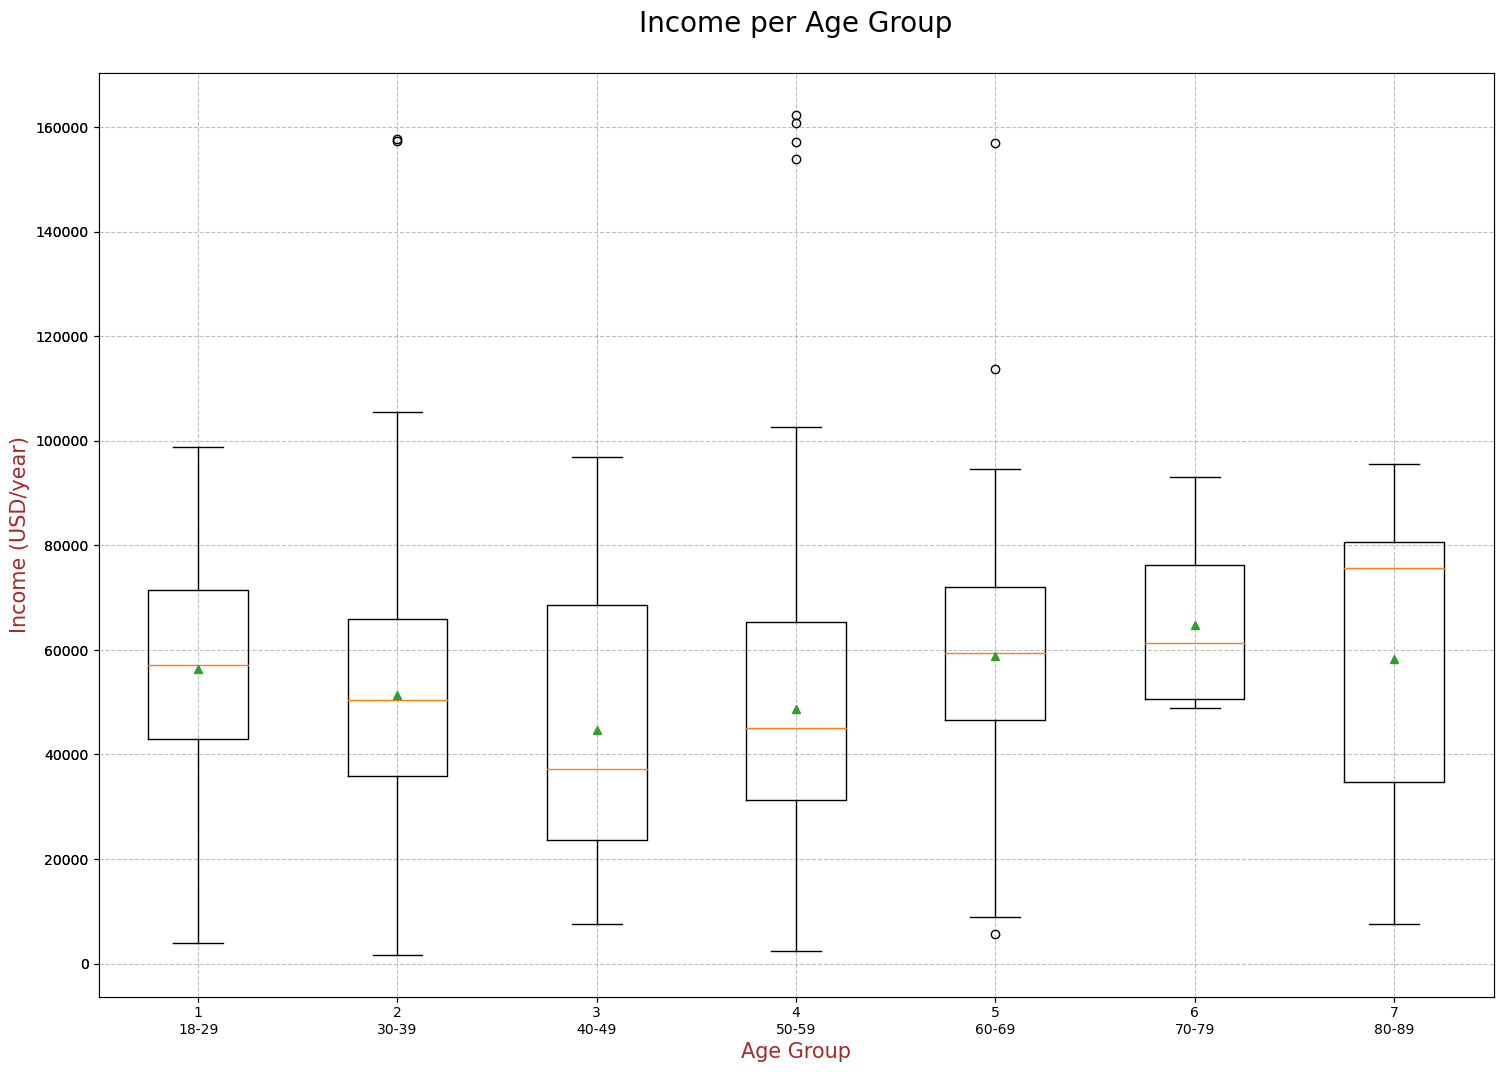

In [48]:
# Income per Age group boxplot
plotdata = [*(content_based_df.loc[content_based_df['Age_Group']==age_group, 'Income'] 
 for age_group in content_based_df['Age_Group'].unique())]

# Multiple boxplot visualisation
fig = plt.figure(figsize = [18,12])
plt.boxplot(plotdata)
ax = fig.add_subplot(111)
bp = ax.boxplot(plotdata, showmeans=True) #show mean values

plt.xticks((1,2,3,4,5,6,7),['\n18-29','\n30-39','\n40-49','\n50-59','\n60-69','\n70-79','\n80-89'])
plt.title("Income per Age Group\n", fontdict={'fontsize': 20, 'fontweight' : 20, 'color' : 'Black'})
plt.xlabel("Age Group", fontdict={'fontsize': 15, 'fontweight' : 20, 'color' : 'Brown'})
plt.ylabel("Income (USD/year)", fontdict={'fontsize': 15, 'fontweight' : 20, 'color' : 'Brown'})
plt.grid(True, which='both', linestyle='--', color='gray', alpha=0.5)
plt.show()

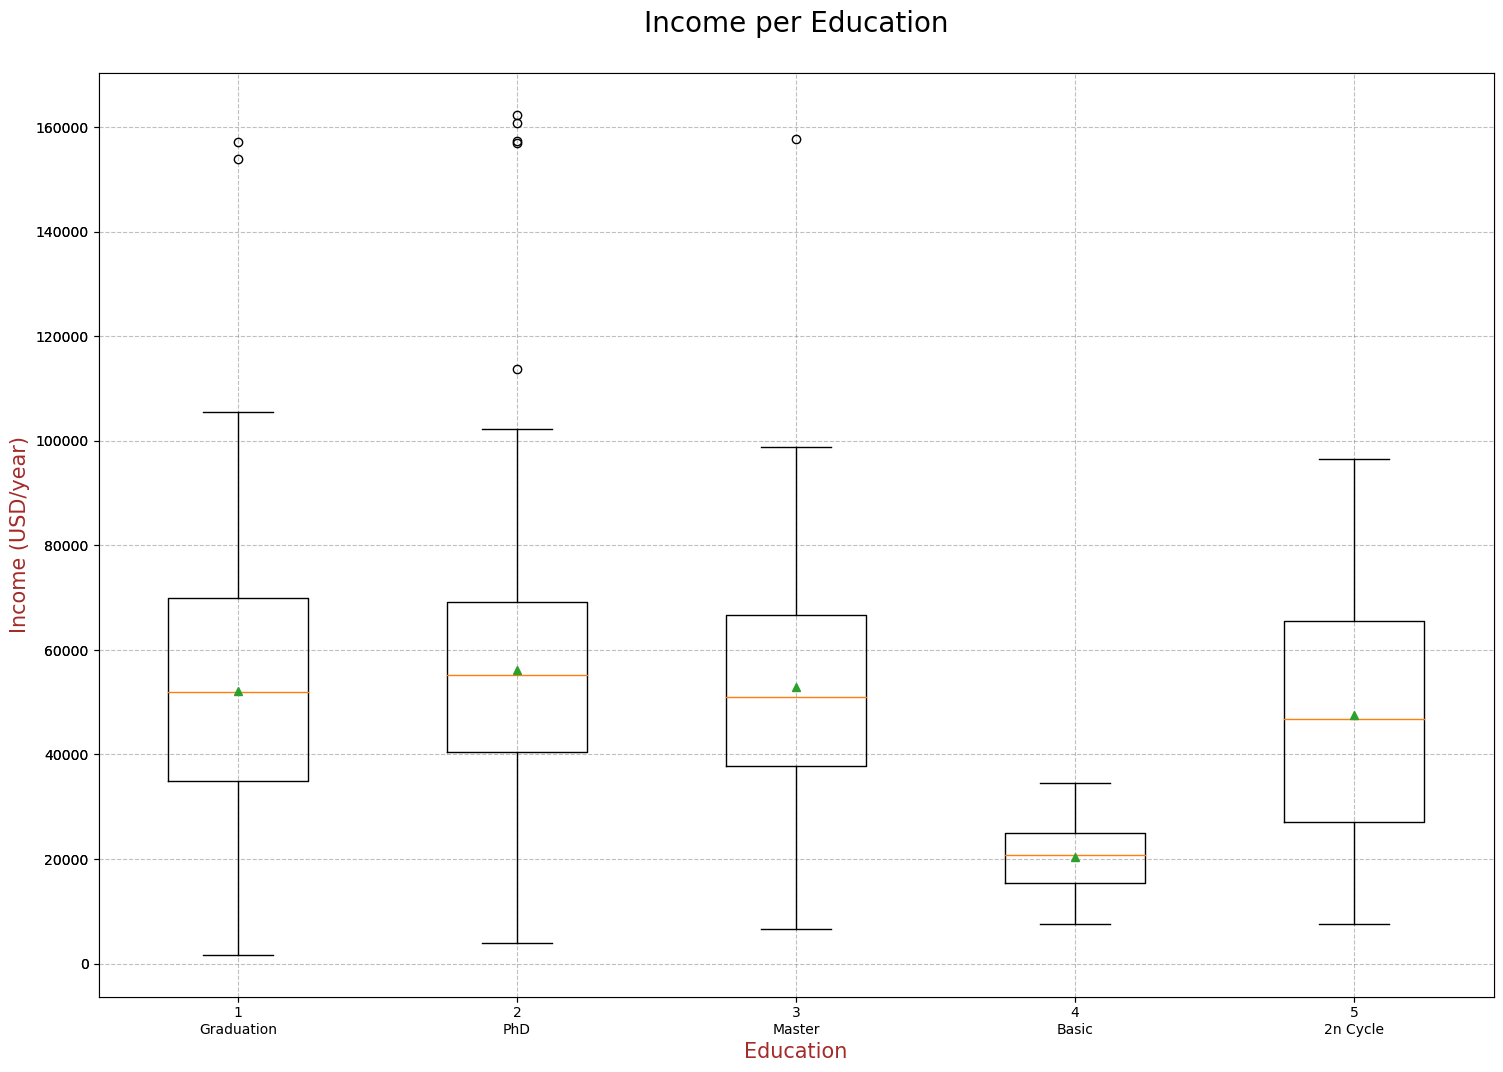

In [49]:
# Income per Education boxplot
plotdata = [*(content_based_df.loc[content_based_df['Education']==education, 'Income'] 
 for education in content_based_df['Education'].unique())]

# Multiple boxplot visualisation
fig = plt.figure(figsize = [18,12])
plt.boxplot(plotdata)
ax = fig.add_subplot(111)
bp = ax.boxplot(plotdata, showmeans=True) #show mean values

plt.xticks((1,2,3,4,5),['\nGraduation','\nPhD','\nMaster','\nBasic','\n2n Cycle'])
plt.title("Income per Education\n", fontdict={'fontsize': 20, 'fontweight' : 20, 'color' : 'Black'})
plt.xlabel("Education", fontdict={'fontsize': 15, 'fontweight' : 20, 'color' : 'Brown'})
plt.ylabel("Income (USD/year)", fontdict={'fontsize': 15, 'fontweight' : 20, 'color' : 'Brown'})
plt.grid(True, which='both', linestyle='--', color='gray', alpha=0.5)
plt.show()

In [50]:
# Average spending per income group

# Drop unnecessary columns
average_spending_per_income_level = total_kidsteen_per_income_level.drop(['Income','Age','Kidhome','Teenhome'], axis=1)
average_spending_per_income_level


MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
Income                                                                        
(1569.333, 17796.7]        884        489             2775              633   
(17796.7, 33863.4]        8775       2399             8136             3553   
(33863.4, 49930.1]       61715       4356            25145             7237   
(49930.1, 65996.8]      208627      14009            73107            18290   
(65996.8, 82063.5]      284451      27107           176430            39689   
(82063.5, 98130.2]      105973       9434            76707            13246   
(98130.2, 114196.9]       4668        425             2213              605   
(114196.9, 130263.6]         0          0                0                0   
(130263.6, 146330.3]         0          0                0                0   
(146330.3, 162397.0]       203         22             4957               26   

                      MntSweetProducts  MntGoldProds  children_count  \
Income                                                                 
(1569.333, 17796.7]                516          2094              82   
(17796.7, 33863.4]                2384          6137             428   
(33863.4, 49930.1]                4498         14632             746   
(49930.1, 65996.8]               13150         29389             584   
(65996.8, 82063.5]               27894         33956             228   
(82063.5, 98130.2]               10443         10278              24   
(98130.2, 114196.9]                933           660               0   
(114196.9, 130263.6]                 0             0               0   
(130263.6, 146330.3]                 0             0               0   
(146330.3, 162397.0]                 9            18               4   

                      children  amount_spent  
Income                                        
(1569.333, 17796.7]         67          7391  
(17796.7, 33863.4]         339         31384  
(33863.4, 49930.1]         507        117583  
(49930.1, 65996.8]         448        356572  
(65996.8, 82063.5]         200        589527  
(82063.5, 98130.2]          16        226081  
(98130.2, 114196.9]          0          9504  
(114196.9, 130263.6]         0             0  
(130263.6, 146330.3]         0             0  
(146330.3, 162397.0]         3          5235

In [51]:
# Calculate total spending for each product category per income group
total_spending_per_income_level = average_spending_per_income_level.sum(axis=0)
total_spending_per_income_level

MntWines             675296
MntFruits             58241
MntMeatProducts      369470
MntFishProducts       83279
MntSweetProducts      59827
MntGoldProds          97164
children_count         2096
children               1580
amount_spent        1343277
dtype: int64

In [52]:
# Calculate the percentage of spending for each income group in each product category
percentage_spending_per_income_level = (average_spending_per_income_level / total_spending_per_income_level) * 100

print("Percentage of spending per income level:")
percentage_spending_per_income_level

Percentage of spending per income level:


MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
Income                                                                         
(1569.333, 17796.7]    0.130906   0.839615         0.751076         0.760096   
(17796.7, 33863.4]     1.299430   4.119091         2.202073         4.266382   
(33863.4, 49930.1]     9.138955   7.479267         6.805695         8.690066   
(49930.1, 65996.8]    30.894156  24.053502        19.786992        21.962319   
(65996.8, 82063.5]    42.122417  46.542813        47.752186        47.657873   
(82063.5, 98130.2]    15.692822  16.198211        20.761361        15.905570   
(98130.2, 114196.9]    0.691252   0.729726         0.598966         0.726474   
(114196.9, 130263.6]   0.000000   0.000000         0.000000         0.000000   
(130263.6, 146330.3]   0.000000   0.000000         0.000000         0.000000   
(146330.3, 162397.0]   0.030061   0.037774         1.341652         0.031220   

                      MntSweetProducts  MntGoldProds  children_count  \
Income                                                                 
(1569.333, 17796.7]           0.862487      2.155119        3.912214   
(17796.7, 33863.4]            3.984823      6.316125       20.419847   
(33863.4, 49930.1]            7.518345     15.059075       35.591603   
(49930.1, 65996.8]           21.980042     30.246799       27.862595   
(65996.8, 82063.5]           46.624434     34.947100       10.877863   
(82063.5, 98130.2]           17.455330     10.577992        1.145038   
(98130.2, 114196.9]           1.559497      0.679264        0.000000   
(114196.9, 130263.6]          0.000000      0.000000        0.000000   
(130263.6, 146330.3]          0.000000      0.000000        0.000000   
(146330.3, 162397.0]          0.015043      0.018525        0.190840   

                       children  amount_spent  
Income                                         
(1569.333, 17796.7]    4.240506      0.550222  
(17796.7, 33863.4]    21.455696      2.336376  
(33863.4, 49930.1]    32.088608      8.753444  
(49930.1, 65996.8]    28.354430     26.544935  
(65996.8, 82063.5]    12.658228     43.887225  
(82063.5, 98130.2]     1.012658     16.830557  
(98130.2, 114196.9]    0.000000      0.707523  
(114196.9, 130263.6]   0.000000      0.000000  
(130263.6, 146330.3]   0.000000      0.000000  
(146330.3, 162397.0]   0.189873      0.389719

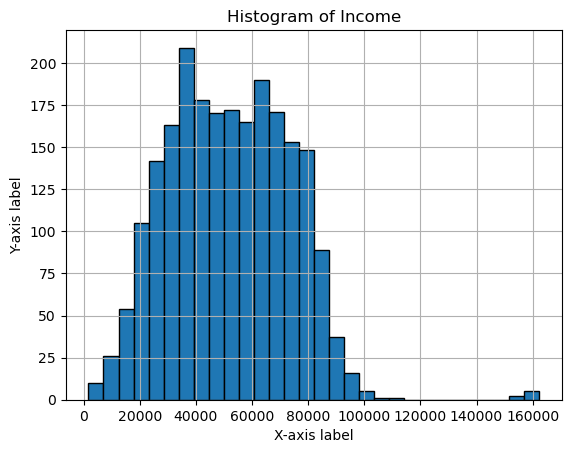

In [53]:
# Datavis Example 2: Histogram of a numerical column
plt.hist(content_based_df['Income'], bins=30, edgecolor='k')
plt.xlabel('X-axis label')
plt.ylabel('Y-axis label')
plt.title('Histogram of Income')
plt.grid()
plt.show()

## 4.2 User-Based Collaborative Filtering (UBCF)
- Uses the similarities between users.
- The similarity calculation is explained by the distance between vectors.
- Personalised recommendations based on their historic preferences.

This method was split into 2 parts: 
- Part 1 initial tests using OneHotEncoder (OHE).
- Part 2 second attempt, not using OHE.

### Cosine similarity

In [54]:
# Import libraries
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.metrics.pairwise import cosine_similarity

In [55]:
# Create dataframe for user-based collaborative filter recommender
customer_similarity_userbased_cf = main_df.drop(['Age_Group',
                                                 'MntWines',
                                                 'MntFruits',
                                                 'MntMeatProducts',
                                                 'MntFishProducts',
                                                 'MntSweetProducts',
                                                 'MntGoldProds'],
                                                axis=1)
customer_similarity_userbased_cf.head()

Education Marital_Status   Income  Age  Kidhome  Teenhome  children_count  \
0  Graduation         Single  58138.0   67        0         0               0   
1  Graduation         Single  46344.0   70        1         1               2   
2  Graduation       Together  71613.0   59        0         0               0   
3  Graduation       Together  26646.0   40        1         0               1   
4         PhD        Married  58293.0   43        1         0               1   

   children  amount_spent  
0         0          1617  
1         1            27  
2         0           776  
3         1            53  
4         1           422

## User-Based Collaborative Filter (UBCF) Part 1

In [56]:
# Test 1: Encode categorical features and normalise numerial
# Then combine all features to calculate the cosine similarity

# Start OneHotEncoder for feature engineering (categorial features)
encoder = OneHotEncoder()

# Encode categorical features for existing customers
encoded_features = encoder.fit_transform(customer_similarity_userbased_cf[['Education', 'Marital_Status']])

scaler = MinMaxScaler()

# Normalise numerical features for existing customers
normalised_numerical_features = scaler.fit_transform(customer_similarity_userbased_cf[['Age', 'Income', 'Kidhome', 'Teenhome']])

# Combine features for existing customers
combined_features = np.hstack((encoded_features.toarray(), normalised_numerical_features))

In [57]:
# Combine features of the new customer into a single feature vector
# Education, Marital_Status, Income, Kidhome, Teenhome, Age
new_customer_data_ubcf1 = [['Master', 'Married', 50000, 0, 0, 45]]

# Encode new customer's categorical features using the existing encoder
encoded_new_customer = encoder.transform([new_customer_data_ubcf1[0][:2]])

# Normalise new customer's numerical features using the existing scaler
normalised_new_customer_numerical_features = scaler.transform([new_customer_data_ubcf1[0][2:]])

# Combine new customer's features
combined_new_customer_features = np.hstack((encoded_new_customer.toarray(), normalised_new_customer_numerical_features))

# Calculate cosine similarity
customer_similarity = cosine_similarity(combined_new_customer_features, combined_features)

# Print similarity matrix
customer_similarity

array([[0.43108086, 0.43025188, 0.35030078, ..., 0.18094036, 0.42467981,
        0.42923252]])

In [58]:
# Find the index of the most similar customer
most_similar_index = np.argmax(customer_similarity)

# Print the index of the most similar customer
print("Index of the most similar customer:", most_similar_index)


Index of the most similar customer: 1930


In [59]:
# Get the indices of the 10 most similar customers in descending order
top_10_indices_desc = np.argsort(customer_similarity)[0][-10:][::-1]

# Retrieve the data of the 10 most similar customers
top_10_customers_desc = main_df.loc[top_10_indices_desc]

# Convert the data into a DataFrame
top_10_df_desc = pd.DataFrame(top_10_customers_desc)

# Print the DataFrame
print("DataFrame of the 10 most similar customers in descending order:")
top_10_df_desc


DataFrame of the 10 most similar customers in descending order:


Education Marital_Status   Income  Age Age_Group  Kidhome  Teenhome  \
1930         PhD        Married  61917.0   50     40-49        1         1   
878       Master         Single  86424.0   68     60-69        0         0   
37      2n Cycle        Married  23718.0   48     40-49        1         0   
1134  Graduation         Single  72903.0   39     30-39        0         0   
342          PhD        Married  55212.0   55     50-59        0         1   
595       Master       Together  17459.0   49     40-49        1         0   
408          PhD       Together  30351.0   50     40-49        1         0   
1254  Graduation       Divorced  68118.0   61     60-69        0         1   
478          PhD        Married  62010.0   52     50-59        0         1   
399     2n Cycle       Together  14515.0   44     40-49        1         0   

      MntWines  MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
1930        46          4               36                2                 2   
878        387         68              569               89                45   
37           6          3               14               15                 7   
1134      1067        138              750                0                19   
342       1103          0               45                0                 0   
595          6          4               16                3                10   
408         14          0               24                3                 3   
1254       595         23              123               10                23   
478        371         22               39                6                 0   
399          6          4                9                6                36   

      MntGoldProds  children_count  children  amount_spent  
1930             1               2         1            91  
878             68               0         0          1226  
37              36               1         1            81  
1134            39               0         0          2013  
342             34               1         1          1182  
595             30               1         1            69  
408              2               1         1            46  
1254           154               1         1           928  
478             92               1         1           530  
399             35               1         1            96

## User-Based Collaborative Filter (UBCF) Part 2

### Cosine distance

In [60]:
# Test 2: Define function to find similar customers 
# Where the categorical features have to be the same, and numeric should be the closest

def find_similar_customers(new_customer_data, customer_data, top_n=10):
    # Convert new customer data to DataFrame
    new_customer_df = pd.DataFrame(new_customer_data, index=[0])
    
    # Filter customers with the same education and marital status
    filtered_data = customer_data[
        (customer_data['Education'] == new_customer_df['Education'].iloc[0]) &
        (customer_data['Marital_Status'] == new_customer_df['Marital_Status'].iloc[0])
    ]
    
    if len(filtered_data) == 0:
        print("No similar customers found.")
        return None
    
    # Calculate cosine similarity for numeric features
    numeric_features = ['Income', 'Kidhome', 'Teenhome', 'Age']
    new_customer_numeric = new_customer_df[numeric_features].values
    customer_numeric = filtered_data[numeric_features].values
    similarity_scores = cosine_similarity(new_customer_numeric, customer_numeric)
    
    # Find the indices of the top n most similar customers
    top_n_indices = similarity_scores.argsort(axis=1)[0][-top_n:][::-1]
    
    # Get the indices of the customers in the original DataFrame
    original_indices = filtered_data.iloc[top_n_indices].index
    
    return original_indices

In [61]:
# Example of usage: New customer
new_customer_data_ubcf2 = {
    'Education': 'Master',
    'Marital_Status': 'Married',
    'Income': 50000,
    'Kidhome': 0,
    'Teenhome': 0,
    'Age': 45
}

# Top 10 similar customers
similar_customer_indices = find_similar_customers(new_customer_data_ubcf2, customer_similarity_userbased_cf, top_n=10)
if similar_customer_indices is not None:
    print("Indices of the top 10 most similar customers:", similar_customer_indices)


Indices of the top 10 most similar customers: Int64Index([217, 554, 1228, 2100, 1506, 800, 527, 806, 2023, 308], dtype='int64')


In [62]:
# Retrieve the top 10 most similar customers
similar_customers_df = main_df.loc[similar_customer_indices]

# Display the DataFrame
similar_customers_df

Education Marital_Status   Income  Age Age_Group  Kidhome  Teenhome  \
217     Master        Married  83790.0   76     70-79        0         0   
554     Master        Married  81698.0   75     70-79        0         0   
1228    Master        Married  54730.0   49     40-49        0         1   
2100    Master        Married  53204.0   48     40-49        1         1   
1506    Master        Married  57136.0   52     50-59        1         1   
800     Master        Married  61872.0   54     50-59        0         1   
527     Master        Married  50353.0   47     40-49        0         0   
806     Master        Married  56850.0   53     50-59        0         1   
2023    Master        Married  77027.0   72     70-79        0         1   
308     Master        Married  64100.0   60     50-59        0         1   

      MntWines  MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
217       1076         16              417               42                48   
554        179         28              520              111               123   
1228       318          3               17                4                 7   
2100        29          0                8                2                 0   
1506       306          5              109               21               109   
800        330          5              159               36                27   
527        141         15              153               67                31   
806         34          1               19                2                 7   
2023       820         57              242               45                 0   
308        509          0               27                0                 0   

      MntGoldProds  children_count  children  amount_spent  
217             16               0         0          1615  
554             47               0         0          1008  
1228            56               1         1           405  
2100             6               2         1            45  
1506            92               2         1           642  
800             16               1         1           573  
527             35               0         0           442  
806              0               1         1            63  
2023            11               1         1          1175  
308             10               1         1           546

In [63]:
# Fetching the most similar customer's data
most_similar_customer = similar_customers_df.iloc[0]  # Select the first row assuming it's the most similar
most_similar_customer

Education            Master
Marital_Status      Married
Income              83790.0
Age                      76
Age_Group             70-79
Kidhome                   0
Teenhome                  0
MntWines               1076
MntFruits                16
MntMeatProducts         417
MntFishProducts          42
MntSweetProducts         48
MntGoldProds             16
children_count            0
children                  0
amount_spent           1615
Name: 217, dtype: object

In [64]:
# Sum top 10 most similar customers total spend
spending_columns = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
total_spending_all = similar_customers_df[spending_columns].sum()  
total_spending_all

MntWines            3742
MntFruits            130
MntMeatProducts     1671
MntFishProducts      330
MntSweetProducts     352
MntGoldProds         289
dtype: int64

In [65]:
# Calculate how representative is the top 1 similar customer regarding the top 10
# Percentage of spending in each product category
percentage_spending = 100 * most_similar_customer[spending_columns] / total_spending_all  
percentage_spending.sort_values(ascending=False)

MntWines            28.754677
MntMeatProducts     24.955117
MntSweetProducts    13.636364
MntFishProducts     12.727273
MntFruits           12.307692
MntGoldProds         5.536332
dtype: object

In [66]:
top_categories = percentage_spending.sort_values(ascending=False).head(2)
print(f"Recommended product categories: {top_categories}")

Recommended product categories: MntWines           28.754677
MntMeatProducts    24.955117
dtype: object


## 4.3 Artificial Neural Network (ANN)
- The algorithm needs a lot of historical data to train. More data = higher accuracy.
- Multiple features as target.


In [67]:
# Import libraries

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [68]:
nnmodel_df = main_df.drop(['Age_Group'], axis=1)
nnmodel_df.head()

Education Marital_Status   Income  Age  Kidhome  Teenhome  MntWines  \
0  Graduation         Single  58138.0   67        0         0       635   
1  Graduation         Single  46344.0   70        1         1        11   
2  Graduation       Together  71613.0   59        0         0       426   
3  Graduation       Together  26646.0   40        1         0        11   
4         PhD        Married  58293.0   43        1         0       173   

   MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
0         88              546              172                88   
1          1                6                2                 1   
2         49              127              111                21   
3          4               20               10                 3   
4         43              118               46                27   

   MntGoldProds  children_count  children  amount_spent  
0            88               0         0          1617  
1             6               2         1            27  
2            42               0         0           776  
3             5               1         1            53  
4            15               1         1           422

In [69]:
# Define features and target variables
features = ['Education', 'Marital_Status', 'Income', 'Age', 'Kidhome', 'Teenhome']
target = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']


In [70]:
# Split features and target
X = nnmodel_df[features]
y = nnmodel_df[target]


In [71]:
# One-hot encode categorical variables and scale numerical features
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), ['Education', 'Marital_Status']),
        ('num', StandardScaler(), ['Income', 'Age', 'Kidhome', 'Teenhome'])
    ],
    remainder='passthrough'
)


In [72]:
# Transform the features
X_transformed = preprocessor.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=42)


In [73]:
# Define the neural network model
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(len(target))  # Output layer with 6 neurons for each target variable
])

In [74]:
# Compile the model
model.compile(optimizer='adam', loss='mse')

In [75]:
# Train the model
training = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

Epoch 1/100
45/45 [==============================] - 0s 2ms/step - loss: 48814.2539 - val_loss: 48688.2422
Epoch 2/100
45/45 [==============================] - 0s 679us/step - loss: 47642.7383 - val_loss: 46413.8633
Epoch 3/100
45/45 [==============================] - 0s 674us/step - loss: 43563.1445 - val_loss: 39984.6758
Epoch 4/100
45/45 [==============================] - 0s 651us/step - loss: 35342.1836 - val_loss: 30165.7461
Epoch 5/100
45/45 [==============================] - 0s 635us/step - loss: 25142.0898 - val_loss: 20944.2305
Epoch 6/100
45/45 [==============================] - 0s 653us/step - loss: 18042.9160 - val_loss: 16849.6406
Epoch 7/100
45/45 [==============================] - 0s 626us/step - loss: 15682.4463 - val_loss: 15827.2090
Epoch 8/100
45/45 [==============================] - 0s 633us/step - loss: 14907.0830 - val_loss: 15312.0098
Epoch 9/100
45/45 [==============================] - 0s 618us/step - loss: 14485.7070 - val_loss: 15069.5830
Epoch 10/100
45/45 [=

In [76]:
# Evaluate the model
loss = model.evaluate(X_test, y_test)
print("Test Loss:", loss)

14/14 [==============================] - 0s 377us/step - loss: 13838.2812
Test Loss: 13838.28125


In [126]:
cProfile.run("training = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2,verbose=False)")

         7560859 function calls (7099686 primitive calls) in 3.833 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
       10    0.000    0.000    0.000    0.000 <__array_function__ internals>:177(array_equal)
        4    0.000    0.000    0.000    0.000 <__array_function__ internals>:177(concatenate)
        2    0.000    0.000    0.000    0.000 <__array_function__ internals>:177(copyto)
      400    0.000    0.000    0.001    0.000 <__array_function__ internals>:177(ndim)
     1016    0.001    0.000    0.003    0.000 <frozen _collections_abc>:771(get)
      405    0.000    0.000    0.001    0.000 <frozen _collections_abc>:778(__contains__)
       65    0.000    0.000    0.000    0.000 <frozen _collections_abc>:790(items)
       65    0.000    0.000    0.000    0.000 <frozen _collections_abc>:812(__init__)
      194    0.000    0.000    0.000    0.000 <frozen _collections_abc>:859(__iter__)
       12    0.000    0.000    0

In [77]:
# Make predictions for new customer data
new_customer_data = ['Basic', 'Single', 25000, 30, 0, 0]

# Create a DataFrame with the new customer data
new_customer_data_df = pd.DataFrame([new_customer_data], columns=['Education', 'Marital_Status', 'Income', 'Age', 'Kidhome', 'Teenhome'])

# Transform the data and make predictions
new_customer_data_transformed = preprocessor.transform(new_customer_data_df)
predictions = model.predict(new_customer_data_transformed)
print("\n'Education', 'Marital_Status', 'Income', 'Age', 'Kidhome', 'Teenhome'")
print(new_customer_data)
print("\n'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds'")
print("Predictions:", predictions)


1/1 [==============================] - 0s 29ms/step

'Education', 'Marital_Status', 'Income', 'Age', 'Kidhome', 'Teenhome'
['Basic', 'Single', 25000, 30, 0, 0]

'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds'
Predictions: [[44.061794 15.4236   50.241734 21.337872 16.095238 41.608837]]


In [78]:
# Make predictions for new customer data
new_customer_data = ['PhD', 'Married', 55000, 45, 2, 0]

# Create a DataFrame with the new customer data
new_customer_data_df = pd.DataFrame([new_customer_data], columns=['Education', 'Marital_Status', 'Income', 'Age', 'Kidhome', 'Teenhome'])

# Transform the data and make predictions
new_customer_data_transformed = preprocessor.transform(new_customer_data_df)
predictions = model.predict(new_customer_data_transformed)
print("\n'Education', 'Marital_Status', 'Income', 'Age', 'Kidhome', 'Teenhome'")
print(new_customer_data)
print("\n'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds'")
print("Predictions:", predictions)

1/1 [==============================] - 0s 7ms/step

'Education', 'Marital_Status', 'Income', 'Age', 'Kidhome', 'Teenhome'
['PhD', 'Married', 55000, 45, 2, 0]

'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds'
Predictions: [[187.50082   12.891537 106.74878   23.791365  16.72788   21.695625]]


In [79]:
# Make predictions for new customer data
new_customer_data = ['Master', 'Married', 50000, 45, 0, 0]

# Create a dataframe with the new customer data
new_customer_data_df = pd.DataFrame([new_customer_data], columns=['Education', 'Marital_Status', 'Income', 'Age', 'Kidhome', 'Teenhome'])

# Transform the data and make predictions
new_customer_data_transformed = preprocessor.transform(new_customer_data_df)
predictions = model.predict(new_customer_data_transformed)
print("\n'Education', 'Marital_Status', 'Income', 'Age', 'Kidhome', 'Teenhome'")
print(new_customer_data)
print("\n'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds'")
print("Predictions:", predictions)

1/1 [==============================] - 0s 7ms/step

'Education', 'Marital_Status', 'Income', 'Age', 'Kidhome', 'Teenhome'
['Master', 'Married', 50000, 45, 0, 0]

'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds'
Predictions: [[341.55463   33.184925 206.94148   51.05925   37.82547   57.781536]]


In [121]:
cProfile.run("predictions = model.predict(new_customer_data_transformed)")

1/1 [==============================] - 0s 10ms/step
         31212 function calls (29836 primitive calls) in 0.046 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        4    0.000    0.000    0.000    0.000 <__array_function__ internals>:177(array_equal)
        1    0.000    0.000    0.000    0.000 <__array_function__ internals>:177(ndim)
        9    0.000    0.000    0.000    0.000 <frozen _collections_abc>:771(get)
        2    0.000    0.000    0.000    0.000 <frozen _collections_abc>:778(__contains__)
       28    0.000    0.000    0.000    0.000 <frozen _collections_abc>:790(items)
       28    0.000    0.000    0.000    0.000 <frozen _collections_abc>:812(__init__)
       82    0.000    0.000    0.000    0.000 <frozen _collections_abc>:859(__iter__)
        6    0.000    0.000    0.000    0.000 <frozen _collections_abc>:907(pop)
      366    0.000    0.000    0.000    0.000 <frozen abc>:117(__instancecheck__)
    

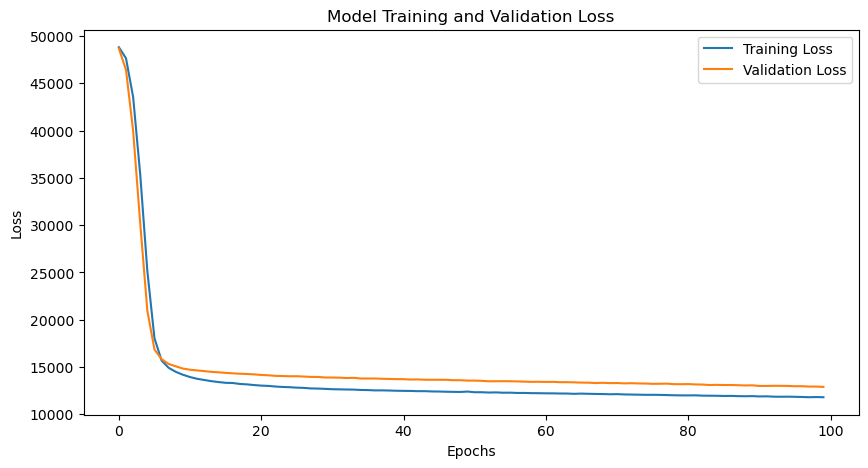

In [80]:
# Plot training and validation loss over epochs
plt.figure(figsize=(10, 5))
plt.plot(training.history['loss'], label='Training Loss')
plt.plot(training.history['val_loss'], label='Validation Loss')
plt.title('Model Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## 4.3 Cluster Method

This method aims to group customers according to their household and spending behaviour data in clusters.

In [81]:
# Import libraries
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [82]:
# Designate a specific dataframe for this method from main_df
cluster_df = main_df.drop(['Age_Group','children_count','children','amount_spent'], axis=1)
cluster_df.head()

Education Marital_Status   Income  Age  Kidhome  Teenhome  MntWines  \
0  Graduation         Single  58138.0   67        0         0       635   
1  Graduation         Single  46344.0   70        1         1        11   
2  Graduation       Together  71613.0   59        0         0       426   
3  Graduation       Together  26646.0   40        1         0        11   
4         PhD        Married  58293.0   43        1         0       173   

   MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  
0         88              546              172                88            88  
1          1                6                2                 1             6  
2         49              127              111                21            42  
3          4               20               10                 3             5  
4         43              118               46                27            15

In [83]:
# Define the features
X = cluster_df

# Apply transformations: Standardize numeric data and encode categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['Income', 'Age']),
        ('cat', OneHotEncoder(), ['Education', 'Marital_Status'])
    ], remainder='passthrough')

X_prepared = preprocessor.fit_transform(X)

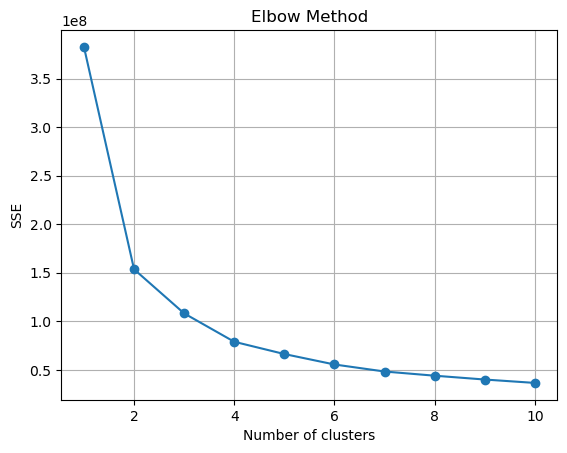

In [84]:
# Elbow method to find the optimal number of clusters
# Sum Squared Error (SSE)
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_prepared)
    sse.append(kmeans.inertia_)

plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.title('Elbow Method')
plt.grid()
plt.show()

In [85]:
# Applying clustering based on the elbow point found k=3
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_prepared)
cluster_df['Cluster'] = clusters

In [124]:
cProfile.run("clusters = kmeans.fit_predict(X_prepared)")

         164124 function calls (163653 primitive calls) in 0.482 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
      270    0.000    0.000    0.002    0.000 <__array_function__ internals>:177(all)
       90    0.000    0.000    0.000    0.000 <__array_function__ internals>:177(argmin)
      254    0.000    0.000    0.002    0.000 <__array_function__ internals>:177(array_equal)
       90    0.000    0.000    0.003    0.000 <__array_function__ internals>:177(clip)
        1    0.000    0.000    0.000    0.000 <__array_function__ internals>:177(concatenate)
       33    0.000    0.000    0.000    0.000 <__array_function__ internals>:177(copyto)
       90    0.000    0.000    0.001    0.000 <__array_function__ internals>:177(cumsum)
      355    0.000    0.000    0.007    0.000 <__array_function__ internals>:177(einsum)
       10    0.000    0.000    0.000    0.000 <__array_function__ internals>:177(empty_like)
       90    0

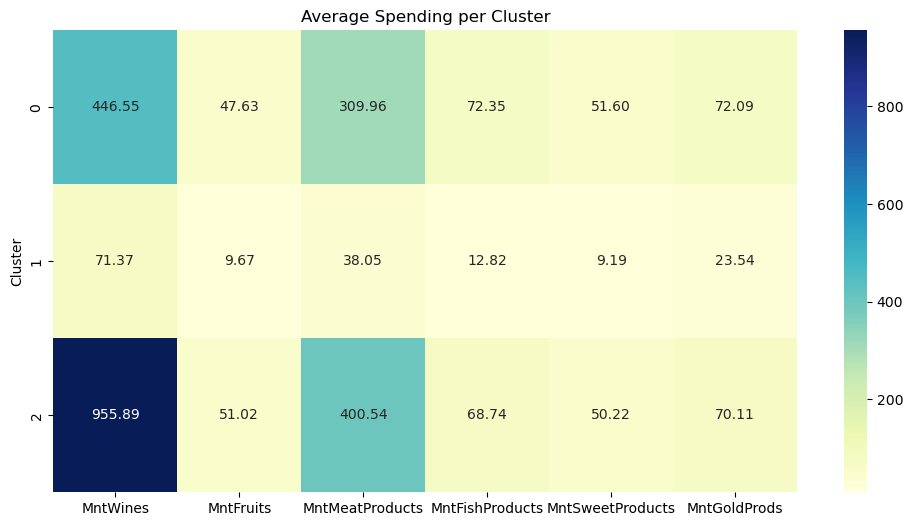

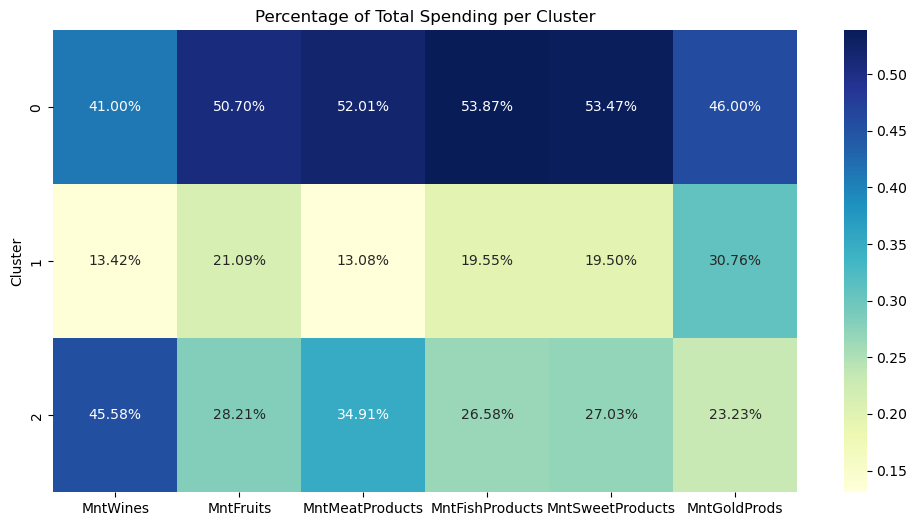

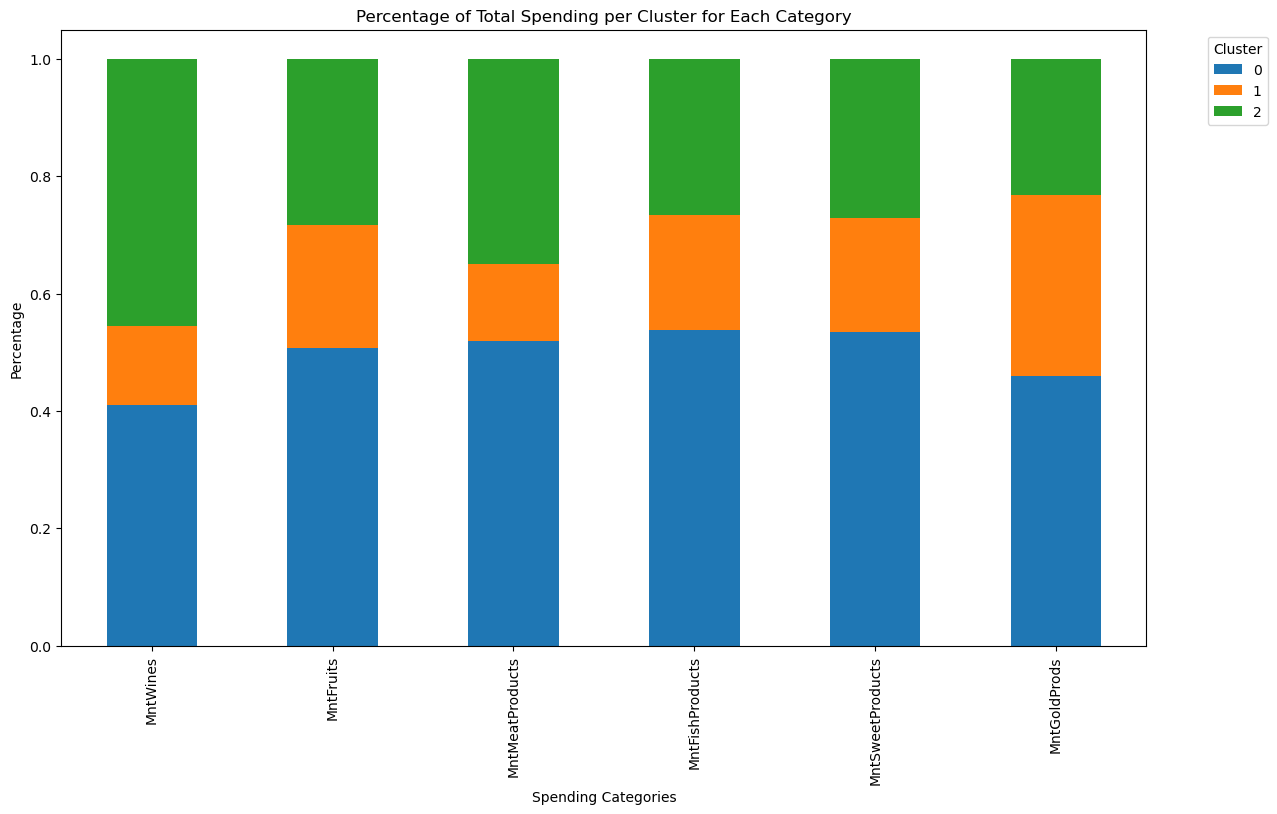

In [86]:
# Average spending in each category per cluster
spending_columns = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
clustered_spending_means = cluster_df.groupby('Cluster')[spending_columns].mean()
plt.figure(figsize=(12, 6))
sns.heatmap(clustered_spending_means, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title('Average Spending per Cluster')
plt.show()

# Total spending in each category per cluster
total_spending_by_cluster = cluster_df.groupby('Cluster')[spending_columns].sum()

# Percentage of total spending by clusters within each category
percentage_spending_by_cluster = total_spending_by_cluster.div(total_spending_by_cluster.sum(axis=0), axis=1)
plt.figure(figsize=(12, 6))
sns.heatmap(percentage_spending_by_cluster, annot=True, cmap="YlGnBu", fmt=".2%")
plt.title('Percentage of Total Spending per Cluster')
plt.show()

# Using bar plots for each category
percentage_spending_by_cluster.T.plot(kind='bar', figsize=(14, 8), stacked=True)
plt.title('Percentage of Total Spending per Cluster for Each Category')
plt.ylabel('Percentage')
plt.xlabel('Spending Categories')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [87]:
# Group data by cluster and calculate means for all features including demographics
cluster_profiles = cluster_df.groupby('Cluster')[['Education', 'Marital_Status', 'Income', 'Age', 'Kidhome', 'Teenhome'] + spending_columns].agg(['mean', 'count'])
print(cluster_profiles)

# Check categorical values via modes
cluster_modes = cluster_df.groupby('Cluster')['Education', 'Marital_Status'].agg(pd.Series.mode)
print(cluster_modes)

               Income              Age         Kidhome        Teenhome        \
                 mean count       mean count      mean count      mean count   
Cluster                                                                        
0        68147.083871   620  57.548387   620  0.125806   620  0.550000   620   
1        38324.466142  1270  53.481890  1270  0.688976  1270  0.517323  1270   
2        74564.052795   322  56.673913   322  0.074534   322  0.375776   322   

           MntWines        MntFruits       MntMeatProducts        \
               mean count       mean count            mean count   
Cluster                                                            
0        446.548387   620  47.627419   620      309.964516   620   
1         71.370079  1270   9.670866  1270       38.046457  1270   
2        955.888199   322  51.024845   322      400.537267   322   

        MntFishProducts       MntSweetProducts       MntGoldProds        
                   mean count       

In [88]:
# Reprocessing the model for new customer data entry, when there is no historical spending behaviour
# Define features and create a DataFrame for demonstration purposes
features = ['Education', 'Marital_Status', 'Income', 'Age', 'Kidhome', 'Teenhome']
demo_data = cluster_df[features]

# Preprocessing: Standardising numeric features and encoding categorical features
preprocessor_demo = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['Income', 'Age']),
        ('cat', OneHotEncoder(), ['Education', 'Marital_Status'])
    ], remainder='passthrough')

demo_data_prepared = preprocessor_demo.fit_transform(demo_data)

# Clustering
kmeans_demo = KMeans(n_clusters=3, random_state=42)
kmeans_demo.fit(demo_data_prepared)


KMeans(n_clusters=3, random_state=42)

In [117]:
# Example: New customer's demographic data
new_customer_demo = {
    'Education': 'Master',
    'Marital_Status': 'Married',
    'Income': 50000,
    'Age': 45,
    'Kidhome': 0,
    'Teenhome': 0
}

# Create a DataFrame for the new customer
new_customer_demo_df = pd.DataFrame([new_customer_demo])

# Preprocess the new customer data
new_customer_demo_prepared = preprocessor_demo.transform(new_customer_demo_df)

# Predict the cluster
predicted_cluster = kmeans_demo.predict(new_customer_demo_prepared)
print(f"The new customer belongs to cluster: {predicted_cluster[0]}")


The new customer belongs to cluster: 0


In [122]:
cProfile.run("predicted_cluster = kmeans_demo.predict(new_customer_demo_prepared)")

         14425 function calls in 0.016 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        2    0.000    0.000    0.000    0.000 <__array_function__ internals>:177(copyto)
        1    0.000    0.000    0.000    0.000 <__array_function__ internals>:177(einsum)
        1    0.000    0.000    0.000    0.000 <__array_function__ internals>:177(sum)
        2    0.000    0.000    0.000    0.000 <frozen abc>:117(__instancecheck__)
        2    0.000    0.000    0.000    0.000 <frozen abc>:121(__subclasscheck__)
      590    0.001    0.000    0.002    0.000 <frozen posixpath>:140(basename)
      590    0.000    0.000    0.000    0.000 <frozen posixpath>:41(_get_sep)
        1    0.000    0.000    0.015    0.015 <string>:1(<module>)
        1    0.000    0.000    0.001    0.001 __init__.py:342(__init__)
        1    0.000    0.000    0.000    0.000 __init__.py:370(_FuncPtr)
        5    0.000    0.000    0.000    0.000 __init__

# 5. Evaluation

In [90]:
import sys
import pickle

## 5.1 Collaborative Filter

### Peason similarity

In [91]:
# Import library
from scipy.stats import pearsonr

In [92]:
# Implement pearson similarity to the previous function
def find_similar_customers(new_customer_data, customer_data, top_n=10, method='cosine'):
    new_customer_df = pd.DataFrame(new_customer_data, index=[0])
    filtered_data = customer_data[
        (customer_data['Education'] == new_customer_df['Education'].iloc[0]) &
        (customer_data['Marital_Status'] == new_customer_df['Marital_Status'].iloc[0])
    ]

    if len(filtered_data) == 0:
        print("No similar customers found.")
        return None

    numeric_features = ['Income', 'Kidhome', 'Teenhome', 'Age']
    new_customer_numeric = new_customer_df[numeric_features].values
    customer_numeric = filtered_data[numeric_features].values

    if method == 'pearson':
        # Calculate Pearson similarity for each customer
        similarity_scores = [pearsonr(new_customer_numeric.flatten(), customer.flatten())[0] for customer in customer_numeric]
    else:
        # Calculate cosine similarity and flatten the result for easy handling
        similarity_scores = cosine_similarity(new_customer_numeric, customer_numeric).flatten()

    # Get indices of the top n most similar customers
    top_indices = np.argsort(similarity_scores)[-top_n:][::-1]
    return filtered_data.iloc[top_indices].index.tolist()

# Usage example
new_customer_data = {
    'Education': 'Master',
    'Marital_Status': 'Married',
    'Income': 50000,
    'Kidhome': 0,
    'Teenhome': 0,
    'Age': 45
}

pearson_indices = find_similar_customers(new_customer_data_ubcf2, customer_similarity_userbased_cf, method='pearson')
cosine_indices = find_similar_customers(new_customer_data_ubcf2, customer_similarity_userbased_cf, method='cosine')

In [93]:
print("Cosine similarity:", cosine_indices)

Cosine similarity: [217, 554, 1228, 2100, 1506, 800, 527, 806, 2023, 308]


In [94]:
print("Pearson similarity:", pearson_indices)

Pearson similarity: [217, 1506, 2100, 554, 1228, 1503, 1929, 806, 2023, 308]


In [95]:
# Convert lists to sets for easy comparison
pearson_set = set(pearson_indices)
cosine_set = set(cosine_indices)

# Find common and unique indices
common_indices = pearson_set.intersection(cosine_set)
unique_to_pearson = pearson_set.difference(cosine_set)
unique_to_cosine = cosine_set.difference(pearson_set)

print("Common Indices:", common_indices)
print("Unique to Pearson:", unique_to_pearson)
print("Unique to Cosine:", unique_to_cosine)


Common Indices: {1506, 806, 2023, 554, 1228, 2100, 308, 217}
Unique to Pearson: {1929, 1503}
Unique to Cosine: {800, 527}


In [96]:
# Retrieve the top 10 most similar customers
similar_customers_df = main_df.loc[cosine_indices]

# The most similar customer's data
most_similar_customer = similar_customers_df.iloc[0] 

# Sum top 10 most similar customers total spend
spending_columns = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
total_spending_all = similar_customers_df[spending_columns].sum()  

# Calculate how representative is the top 1 similar customer regarding the top 10
# Percentage of spending in each product category
percentage_spending = 100 * most_similar_customer[spending_columns] / total_spending_all  
percentage_spending.sort_values(ascending=False)

top_categories = percentage_spending.sort_values(ascending=False).head(2)
print(f"Recommended product categories: {top_categories}")


Recommended product categories: MntWines           28.754677
MntMeatProducts    24.955117
dtype: object


In [123]:
cProfile.run("cosine_indices = find_similar_customers(new_customer_data_ubcf2, customer_similarity_userbased_cf, method='cosine')")

         5267 function calls (5192 primitive calls) in 0.013 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000    0.013    0.013 3523373424.py:2(find_similar_customers)
        1    0.000    0.000    0.000    0.000 <__array_function__ internals>:177(argsort)
        1    0.000    0.000    0.000    0.000 <__array_function__ internals>:177(array_equal)
       10    0.000    0.000    0.000    0.000 <__array_function__ internals>:177(copyto)
        2    0.000    0.000    0.000    0.000 <__array_function__ internals>:177(einsum)
        2    0.000    0.000    0.000    0.000 <__array_function__ internals>:177(may_share_memory)
        4    0.000    0.000    0.000    0.000 <__array_function__ internals>:177(sum)
       27    0.000    0.000    0.000    0.000 <frozen abc>:117(__instancecheck__)
        4    0.000    0.000    0.000    0.000 <frozen abc>:121(__subclasscheck__)
        8    0.000    0.000    

## 5.2 Artificial Neural Network
#### Hyperparameter tuning
- early stopping tests
- MSE, MAE and RMSE
- function to tests various optmizers, layers, neurons




#### Early stopping

In [97]:
# Import library
from tensorflow.keras.callbacks import EarlyStopping

In [98]:
# Initialise EarlyStopping
early_stopping = EarlyStopping(
    monitor='val_loss', 
    patience=10,  # Number of epochs with no improvement after which training will be stopped
    verbose=1,  # To log when training is stopped
    restore_best_weights=True  # This restores model weights from the epoch with the lowest validation loss
)

In [118]:
# Train the model with early stopping
history = model.fit(
    X_train, 
    y_train, 
    epochs=100, 
    batch_size=32, 
    validation_split=0.2, 
    callbacks=[early_stopping]
)


Epoch 1/100
45/45 [==============================] - 0s 1ms/step - loss: 11144.7373 - val_loss: 12022.7666
Epoch 2/100
45/45 [==============================] - 0s 666us/step - loss: 11124.0967 - val_loss: 11984.3291
Epoch 3/100
45/45 [==============================] - 0s 670us/step - loss: 11115.5791 - val_loss: 11982.2539
Epoch 4/100
45/45 [==============================] - 0s 648us/step - loss: 11118.5586 - val_loss: 11963.7539
Epoch 5/100
45/45 [==============================] - 0s 638us/step - loss: 11102.4561 - val_loss: 11974.4336
Epoch 6/100
45/45 [==============================] - 0s 668us/step - loss: 11103.9971 - val_loss: 11957.6904
Epoch 7/100
45/45 [==============================] - 0s 642us/step - loss: 11103.1572 - val_loss: 11970.1826
Epoch 8/100
45/45 [==============================] - 0s 649us/step - loss: 11103.0371 - val_loss: 11952.7383
Epoch 9/100
45/45 [==============================] - 0s 633us/step - loss: 11089.0391 - val_loss: 11974.9150
Epoch 10/100
45/45 [=

In [119]:
# Extract the validation loss history
val_loss = history.history['val_loss']

# Find the index of the minimum validation loss
best_epoch = np.argmin(val_loss)
print("Early stopping was triggered after epoch:", best_epoch + 1)

Early stopping was triggered after epoch: 72


In [101]:
# Measure size of the neural network model
model_size = sys.getsizeof(pickle.dumps(model))
print(f"Model size in bytes: {model_size}")

Model size in bytes: 31065


#### Measuring Errors

In [102]:
# Import libraries
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [103]:
# Calculate RMSE and MAE

predictions = model.predict(X_test)
mae = mean_absolute_error(y_test, predictions)
rmse = np.sqrt(mean_squared_error(y_test, predictions))

print("MAE:", mae)
print("RMSE:", rmse)

14/14 [==============================] - 0s 378us/step
MAE: 55.962567150155536
RMSE: 115.3108863635462


#### Visualization of Actual vs. Predicted Values

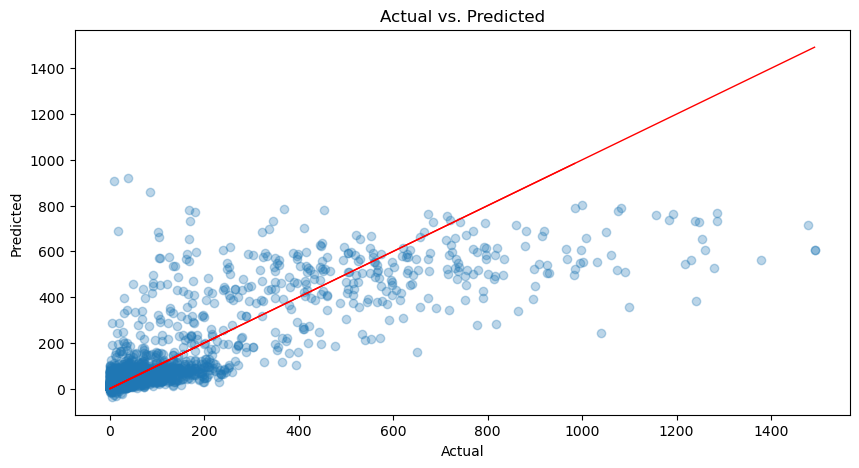

In [104]:
# Plot Predicted vs Actual
plt.figure(figsize=(10, 5))
plt.scatter(y_test, predictions, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=1)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')
plt.show()


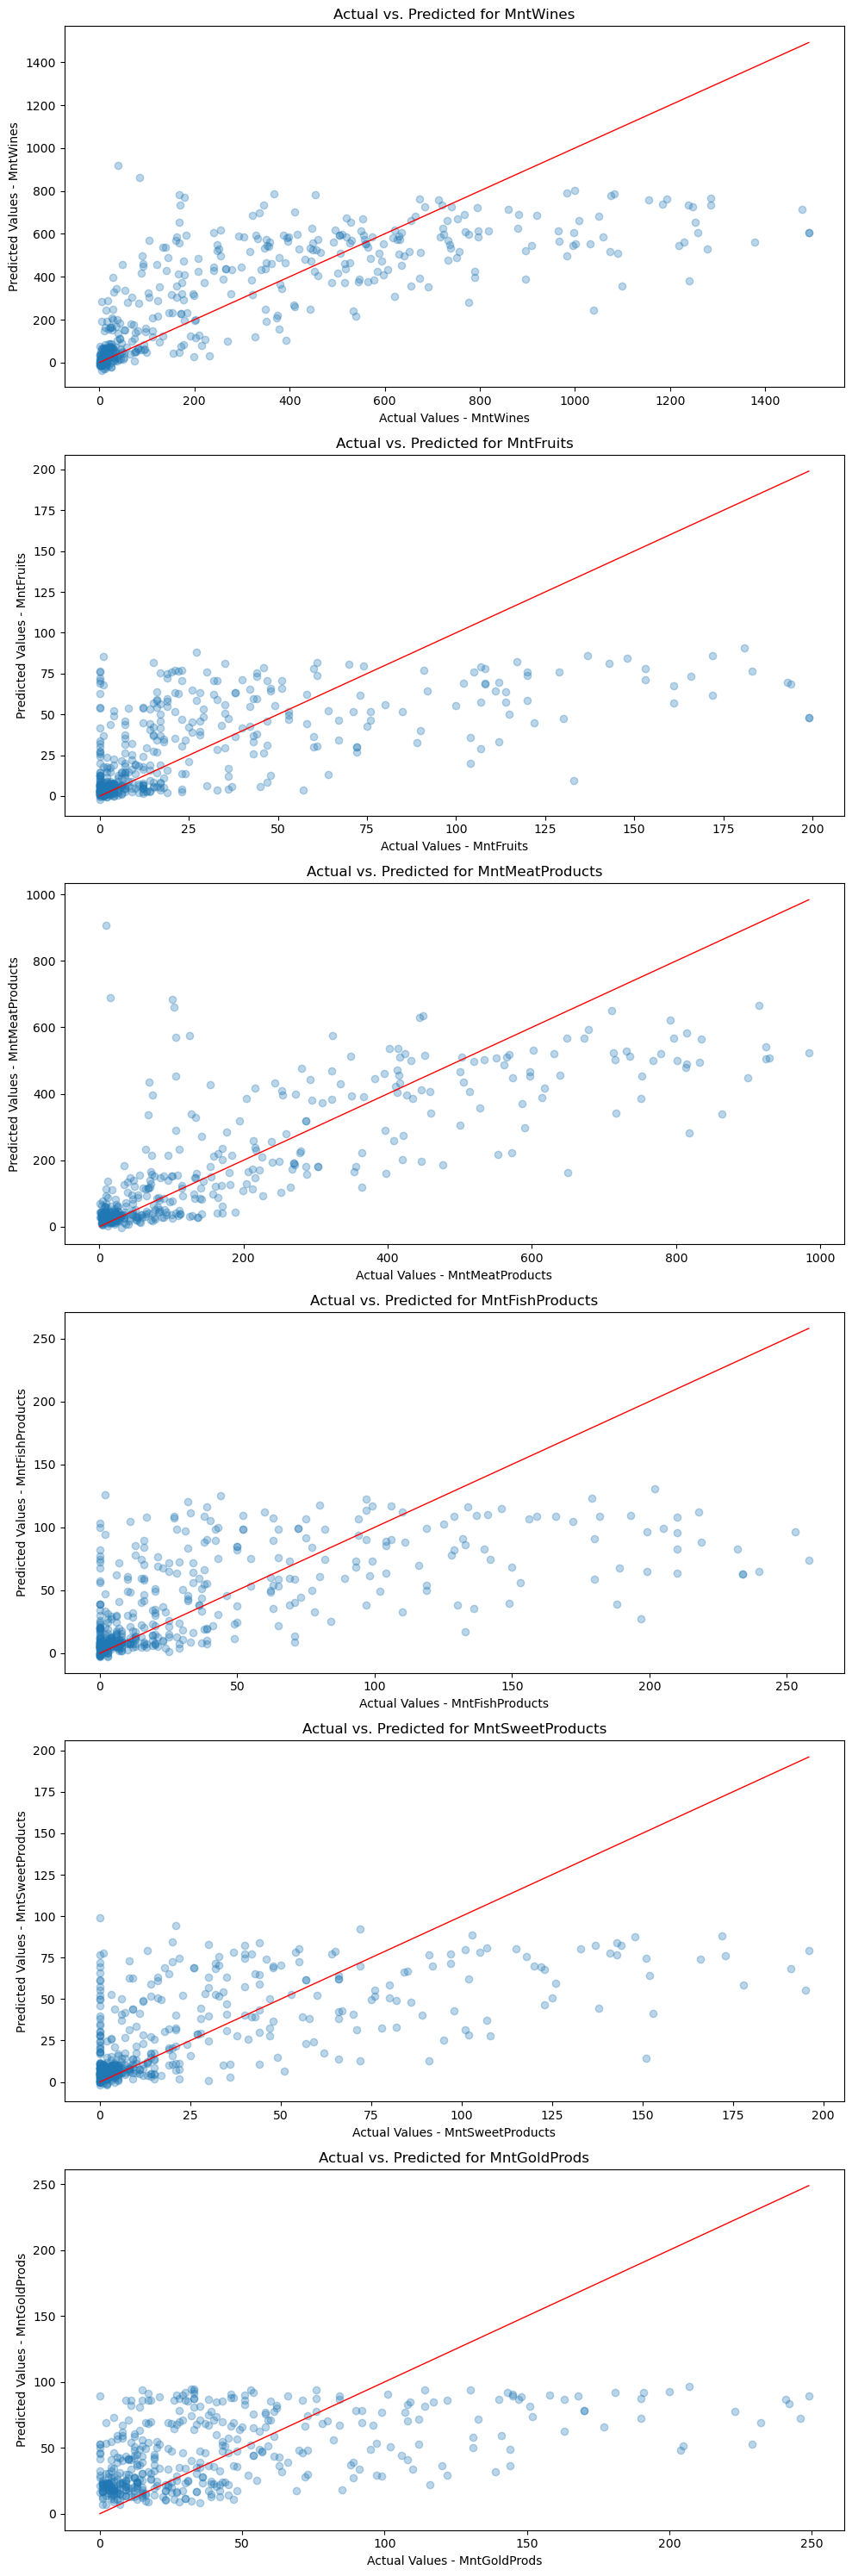

In [105]:
# Plotting separate actual vs. predicted values for each category
categories = y_test.columns  # To get all category names
fig, axes = plt.subplots(nrows=len(categories), ncols=1, figsize=(10, 5 * len(categories)))

for i, cat in enumerate(categories):
    ax = axes[i] if len(categories) > 1 else axes
    ax.scatter(y_test[cat], predictions[:, i], alpha=0.3)
    ax.plot([y_test[cat].min(), y_test[cat].max()], [y_test[cat].min(), y_test[cat].max()], color='red', lw=1)
    ax.set_xlabel('Actual Values - ' + cat)
    ax.set_ylabel('Predicted Values - ' + cat)
    ax.set_title('Actual vs. Predicted for ' + cat)

plt.tight_layout()
plt.show()

#### Hyperparameter Tuning 

In [106]:
# Import Libraries
from tensorflow.keras.optimizers import legacy as legacy_optimizers 
from itertools import product

In [107]:
# Function create_model
def create_model(learning_rate, num_hidden_layers, num_neurons, activation):
    model = Sequential()
    model.add(Dense(num_neurons, activation=activation, input_shape=(X_train.shape[1],)))
    for _ in range(num_hidden_layers - 1):
        model.add(Dense(num_neurons, activation=activation))
    model.add(Dense(len(target)))
    model.compile(optimizer=legacy_optimizers.Adam(learning_rate=learning_rate), loss='mse')
    return model

In [108]:
# Define hyperparameters
parameter_grid = {
    'learning_rate': [0.001, 0.01, 0.1],
    'num_hidden_layers': [1, 2, 3],
    'num_neurons': [16, 32, 64],
    'activation': ['relu', 'tanh']
}

In [109]:
# Perform the grid search
best_parameter = None
best_score = np.inf

for learning_rate, num_hidden_layers, num_neurons, activation in product(
    parameter_grid['learning_rate'],
    parameter_grid['num_hidden_layers'],
    parameter_grid['num_neurons'],
    parameter_grid['activation']
):
    parameter = {
        'learning_rate': learning_rate,
        'num_hidden_layers': num_hidden_layers,
        'num_neurons': num_neurons,
        'activation': activation
    }

    # Create and compile the model
    model1 = create_model(**parameter)

    # Train the model on the training set
    model1.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0)

    # Evaluate the model on the validation set
    loss = model1.evaluate(X_test, y_test, verbose=0)

    # MSE for loss
    if loss < best_score:
        best_score = loss
        best_parameter = parameter

In [110]:
# Print the best hyperparameters and corresponding score
print("Best Hyperparameters: ", best_parameter)
print("Best Loss Score: ", best_score)

Best Hyperparameters:  {'learning_rate': 0.1, 'num_hidden_layers': 1, 'num_neurons': 32, 'activation': 'tanh'}
Best Loss Score:  12717.513671875


## 5.3 Clusters
- Different visualisations to the optimal number of clusters

In [111]:
#!pip install yellowbrick

#Import libraries
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer

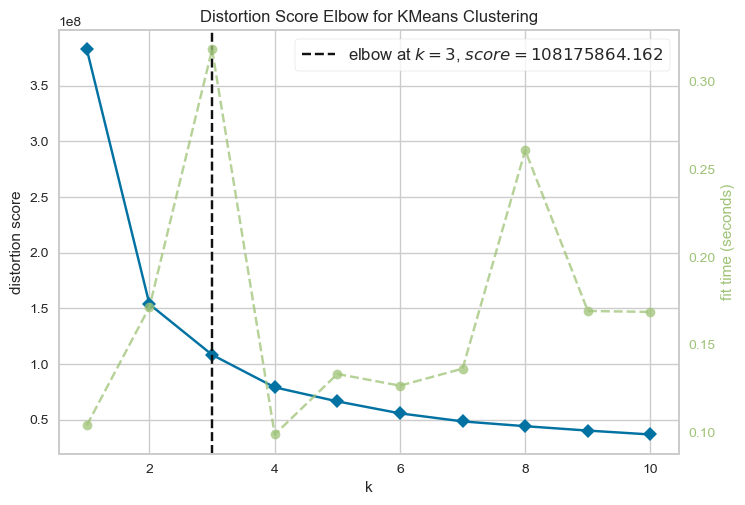

In [112]:
# Assuming X_prepared is your dataset prepared for clustering
model_cluster = KMeans(random_state=42)
visualizer = KElbowVisualizer(model_cluster, k=(1,11), timings=True)

visualizer.fit(X_prepared) 
visualizer.show();           

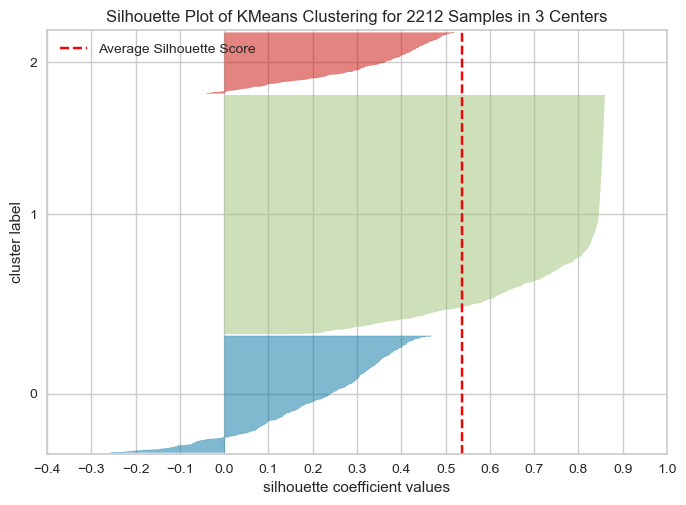

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 2212 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [113]:
# Silhouette plot 1
# Instantiate the clustering model and visualizer
model_cluster2 = KMeans(n_clusters=3, random_state=42)
visualiser = SilhouetteVisualizer(model_cluster2, colors='yellowbrick')

# Fit the preprocessed data to the visualiser
visualiser.fit(X_prepared)  # X_prepared is the preprocessed data
visualiser.show()      

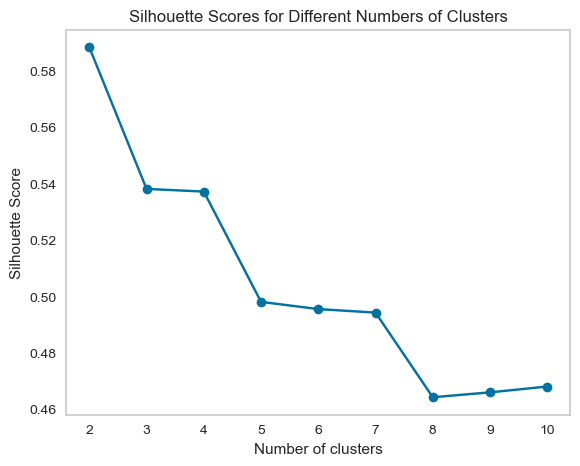

In [114]:
# Silhouette plot 2
silhouette_scores = []

# Calculate silhouette scores for different values of k
for k in range(2, 11):  # Starting from 2 because silhouette score cannot be calculated with a single cluster
    kmeans = KMeans(n_clusters=k, random_state=42)
    clusters = kmeans.fit_predict(X_prepared)
    score = silhouette_score(X_prepared, clusters)
    silhouette_scores.append(score)

# Plotting silhouette scores to find the optimal number of clusters
plt.figure(figsize=(6.5, 5))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for Different Numbers of Clusters')
plt.grid()
plt.show()


In [115]:
# Measure size of the clustering model
model_size = sys.getsizeof(pickle.dumps(model_cluster))
print(f"Model size in bytes: {model_size}")

Model size in bytes: 11330
